In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import rcParams
import seaborn as sns
import warnings
from datetime import date, timedelta

In [55]:
#read data from website
gri = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv', low_memory=False)

In [3]:
# gri = pd.read_csv('Global_Mobility_Report.csv')

C:\Users\Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
#filters to identify country level data
gri = gri[['country_region_code', 'country_region', 
           'sub_region_1', 
           'sub_region_2',
           'metro_area',
           'iso_3166_2_code',
           'census_fips_code',
           'date',
           'residential_percent_change_from_baseline'    ]]

gri['date'] = pd.to_datetime(gri['date'])

mask2 = gri['sub_region_1'].isna()
mask3 = gri['sub_region_2'].isna()
mask4 = gri['metro_area'].isna()
mask5 = gri['iso_3166_2_code'].isna()
mask6 = gri['census_fips_code'].isna()

gri = gri[mask2&mask3&mask4&mask5&mask6]



In [57]:
gri.head()

country_region_code        country_region sub_region_1 sub_region_2  \
0                  AE  United Arab Emirates          NaN          NaN   
1                  AE  United Arab Emirates          NaN          NaN   
2                  AE  United Arab Emirates          NaN          NaN   
3                  AE  United Arab Emirates          NaN          NaN   
4                  AE  United Arab Emirates          NaN          NaN   

  metro_area iso_3166_2_code  census_fips_code       date  \
0        NaN             NaN               NaN 2020-02-15   
1        NaN             NaN               NaN 2020-02-16   
2        NaN             NaN               NaN 2020-02-17   
3        NaN             NaN               NaN 2020-02-18   
4        NaN             NaN               NaN 2020-02-19   

   residential_percent_change_from_baseline  
0                                       1.0  
1                                       1.0  
2                                       1.0  
3                                       1.0  
4                                       1.0

In [58]:
#data manipulation to exclude nan values
temp_list = gri['country_region_code'].unique()
country_list = [x for x in temp_list if pd.isnull(x) == False and x != 'nan']


In [62]:
#calculate 7DMA index for each country
for_graph_list =[]
for i in country_list:
    new_df = pd.DataFrame()
    country = i
    mask = gri['country_region_code'] == country
    gri_temp = gri[mask][['date','residential_percent_change_from_baseline']]
    
    new_df['date'] = gri_temp['date']
    new_df[country+'_residential_index'] = gri_temp['residential_percent_change_from_baseline'].rolling(window=7).mean()
    new_df = new_df.set_index('date')
    
    for_graph_list.append(new_df)
    
df_final = pd.concat(for_graph_list, axis = 1)
df_final = df_final.loc[:,~df_final.columns.duplicated()]  

In [63]:
#plotting function
def plot_gri(df, country):
    
    rcParams['figure.figsize'] = 14,7
    fig, ax = plt.subplots()
    
    ax.plot(df.index, df[country+'_residential_index'], label = 'Google Residential Index', linewidth = 1.4)
    
    ax.set_xlabel("date", fontsize = 14)
    ax.set_ylabel("Google Residential Index")
    ax.set_xlim(['2020-01-01', '2021-08-01'])
    
    ax.grid(axis = 'x', linestyle = '--', linewidth = 0.4)
    ax.grid(axis = 'y', linestyle = '--', linewidth = 0.4)
    
    fig.legend(loc = 'best')
    ax.set_title("Google Residential Index 7DMA:" + " " + country , fontsize = 12)
    
    

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  from ipykernel import kernelapp as app
C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


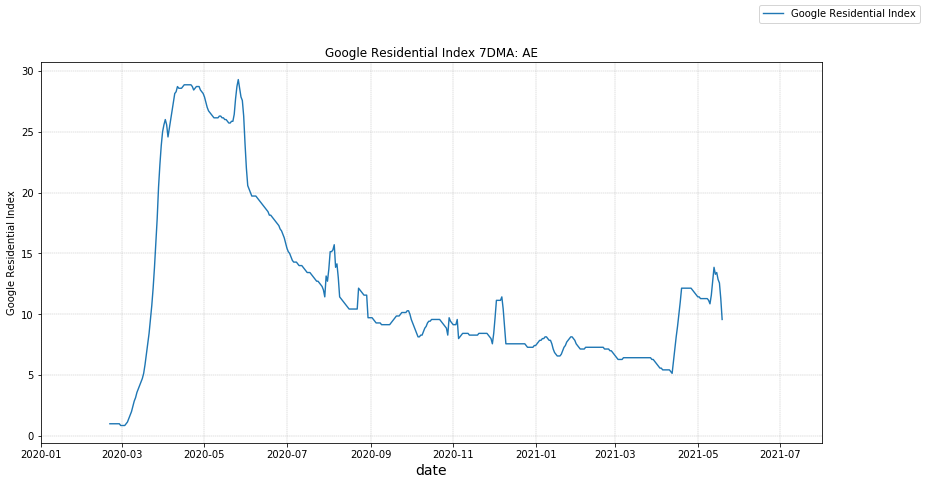

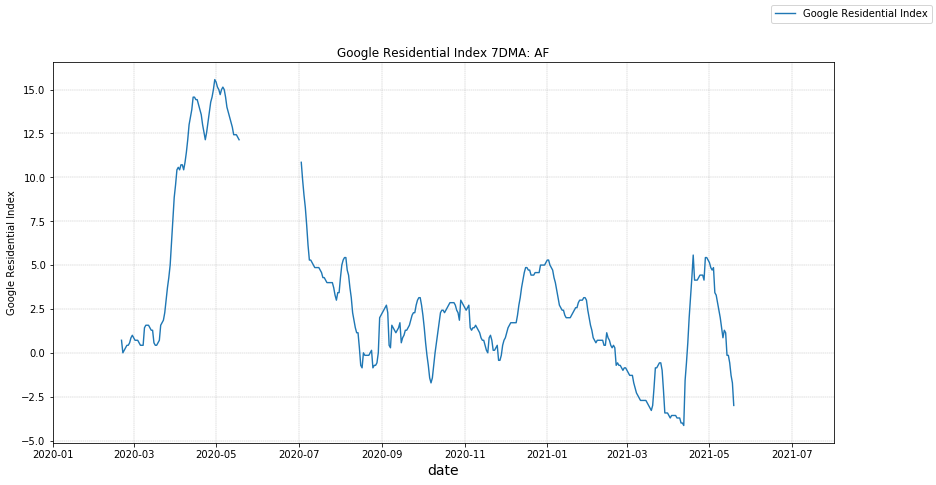

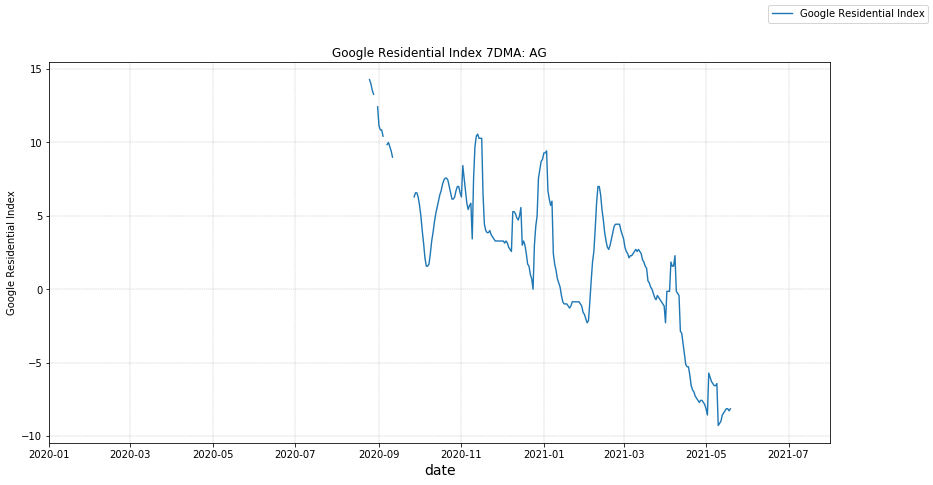

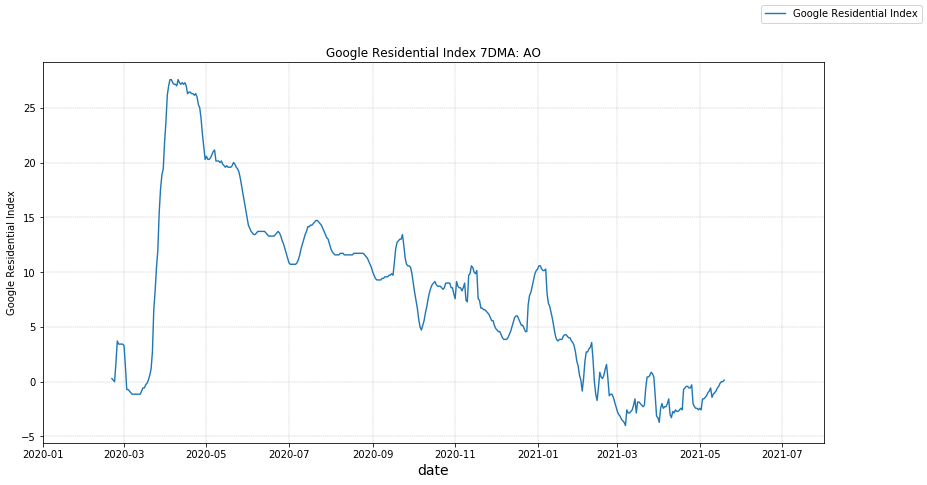

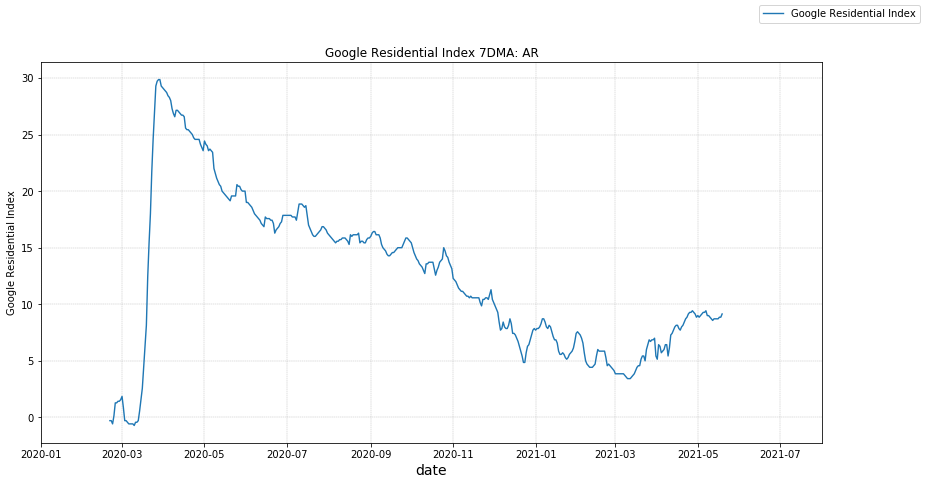

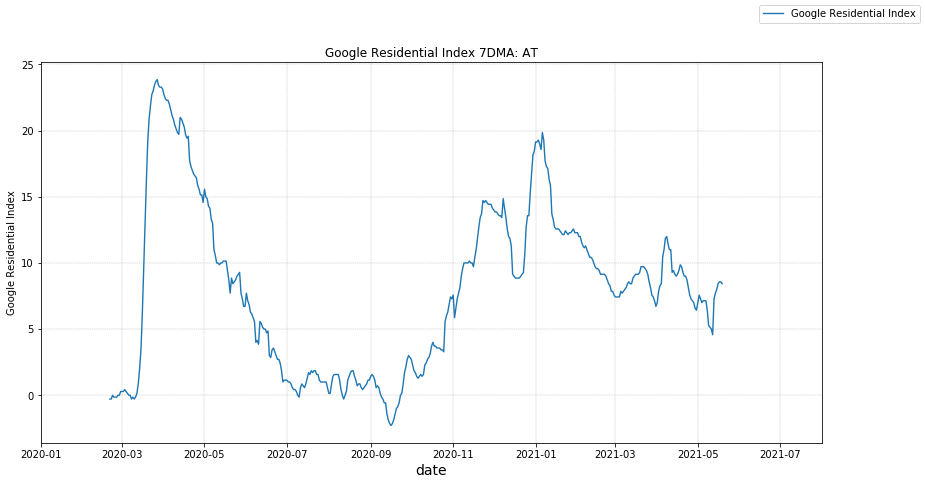

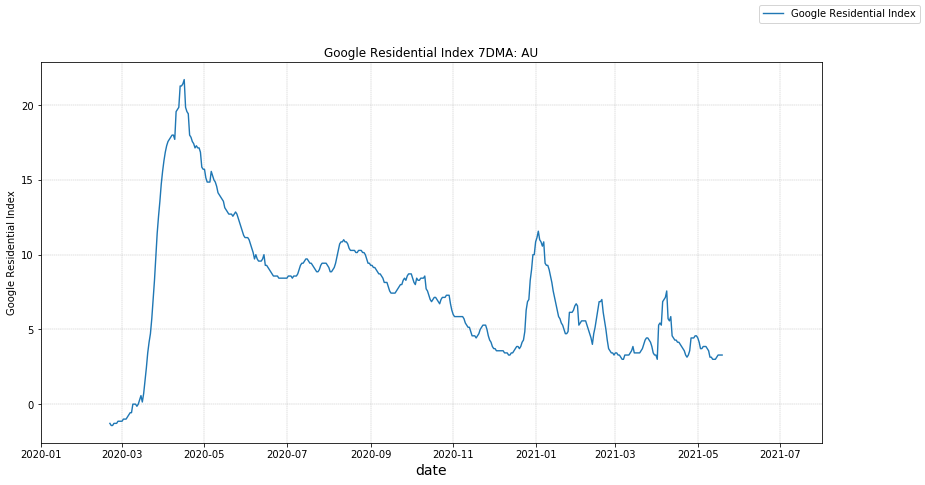

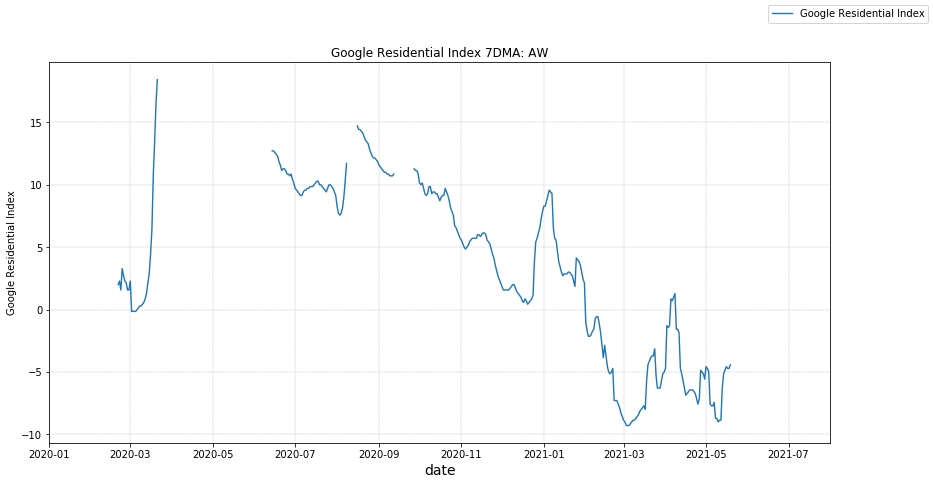

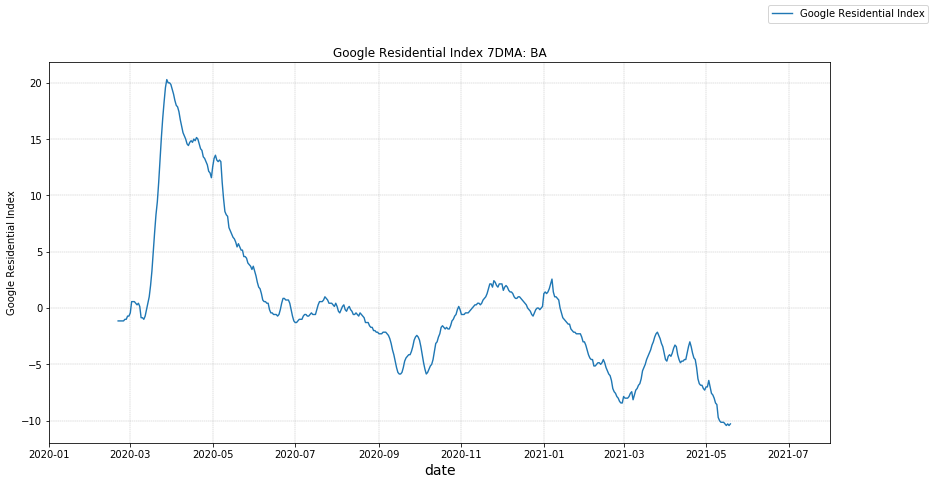

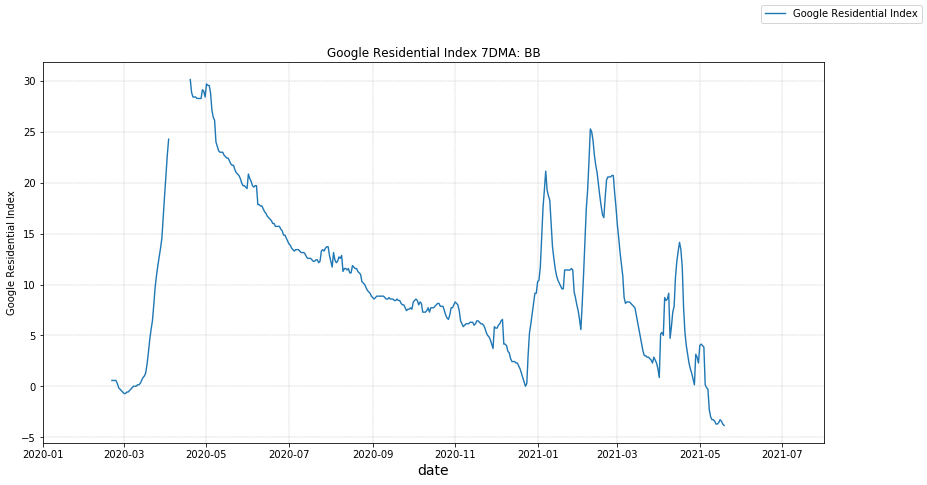

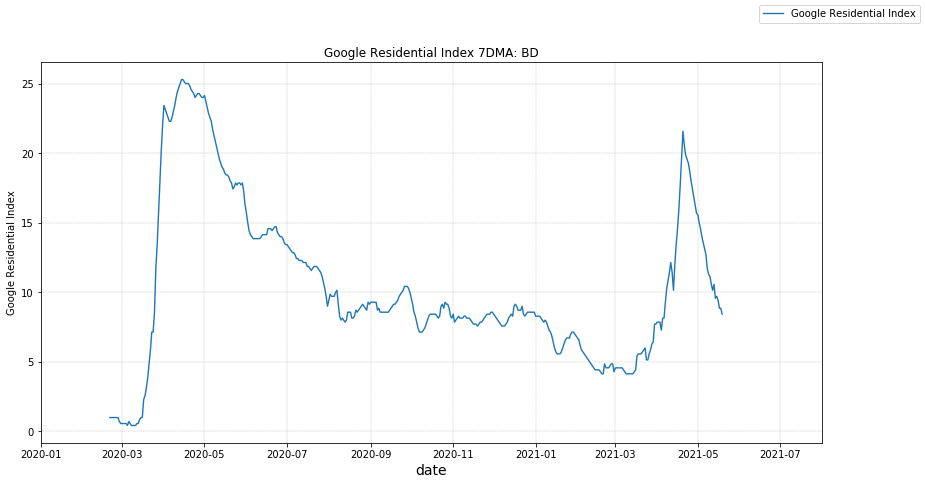

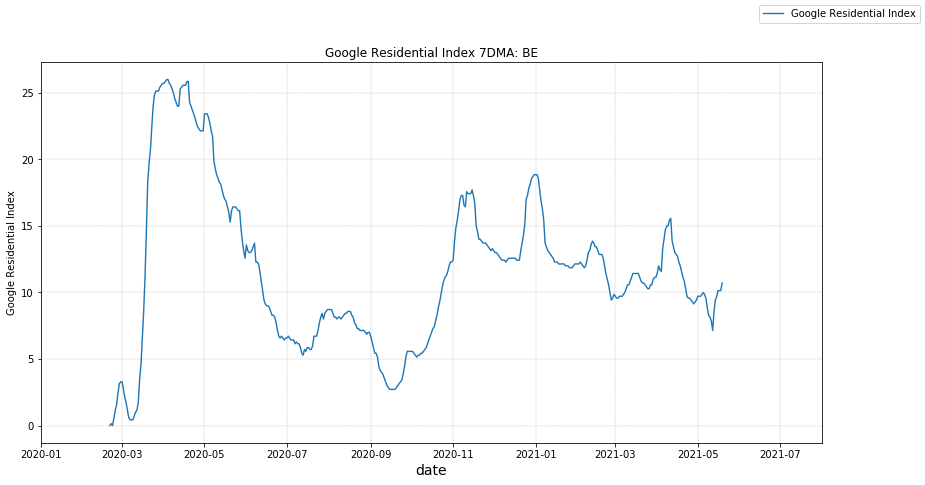

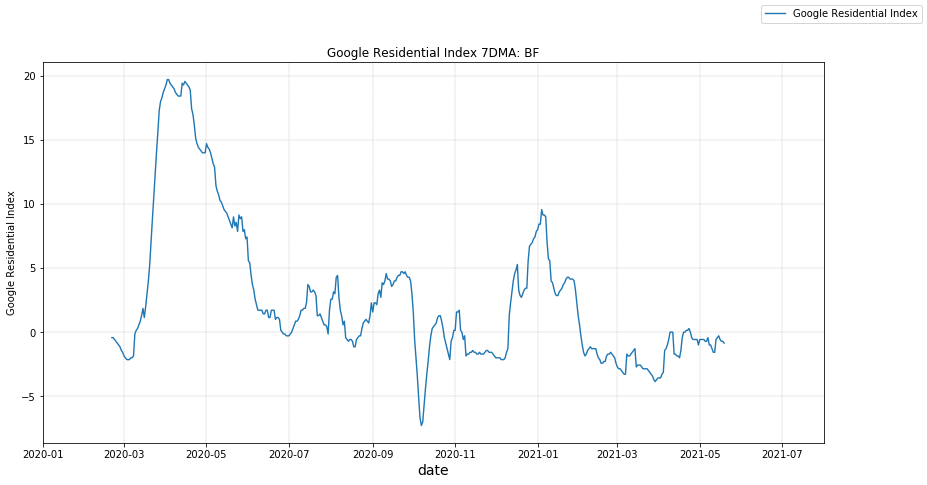

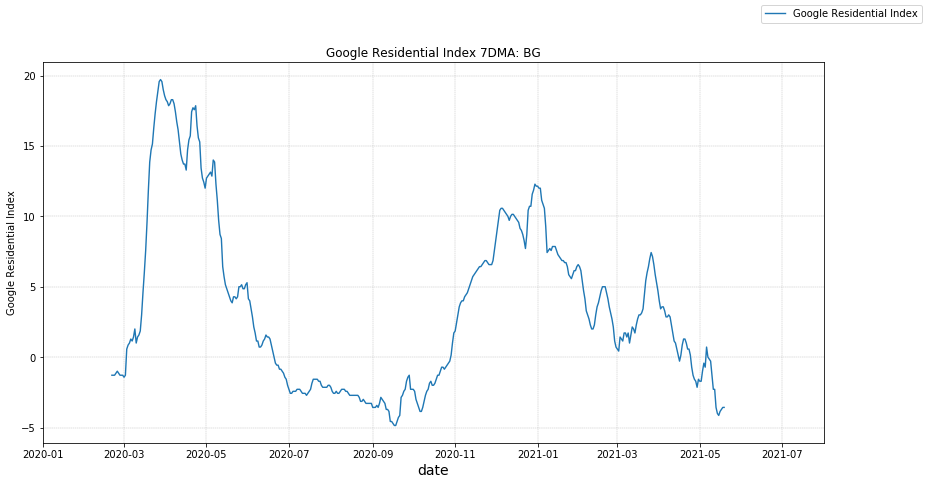

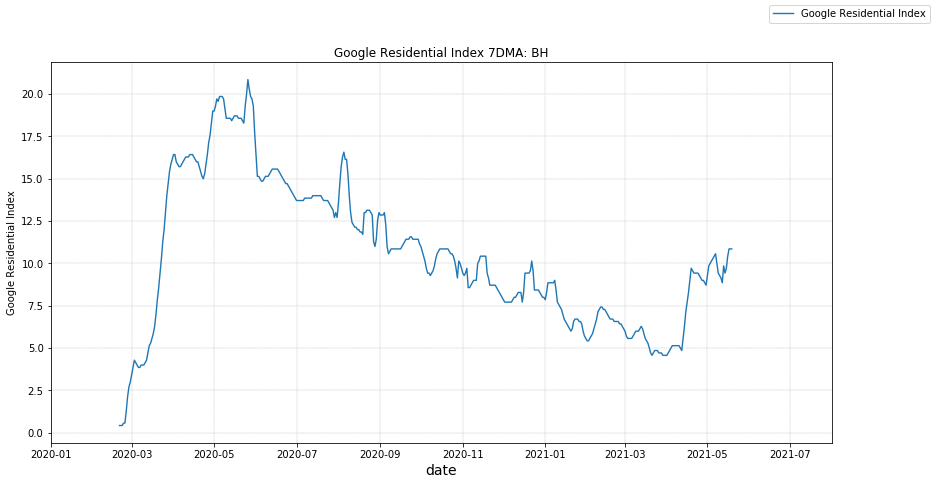

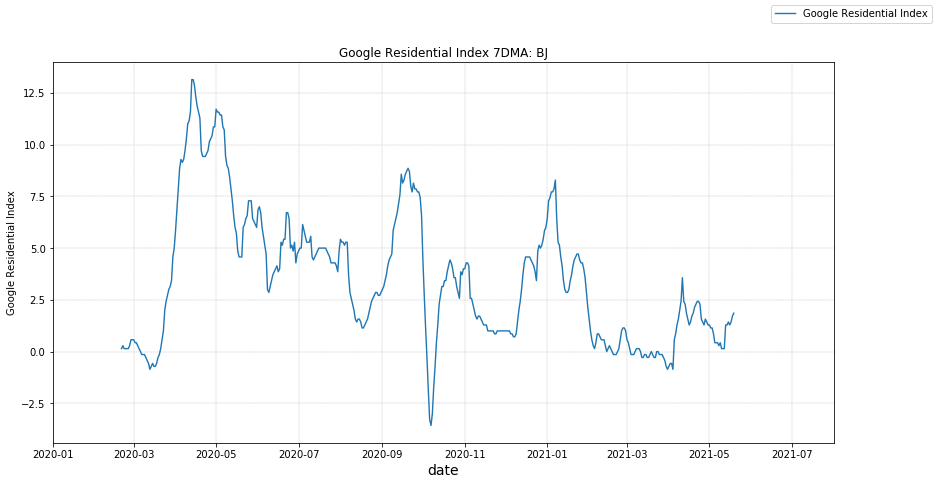

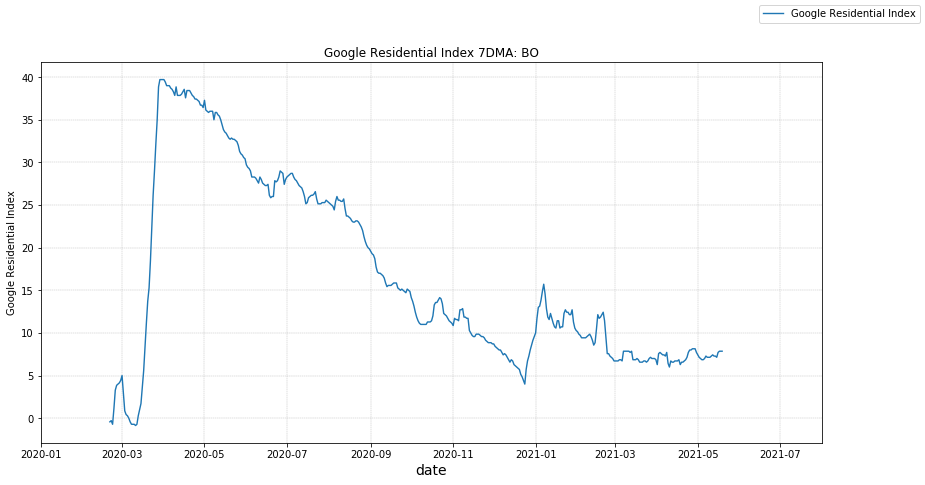

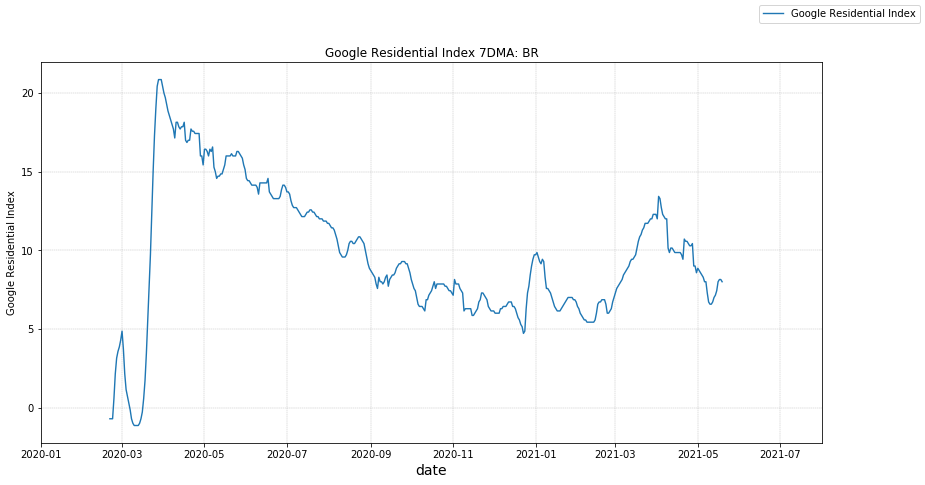

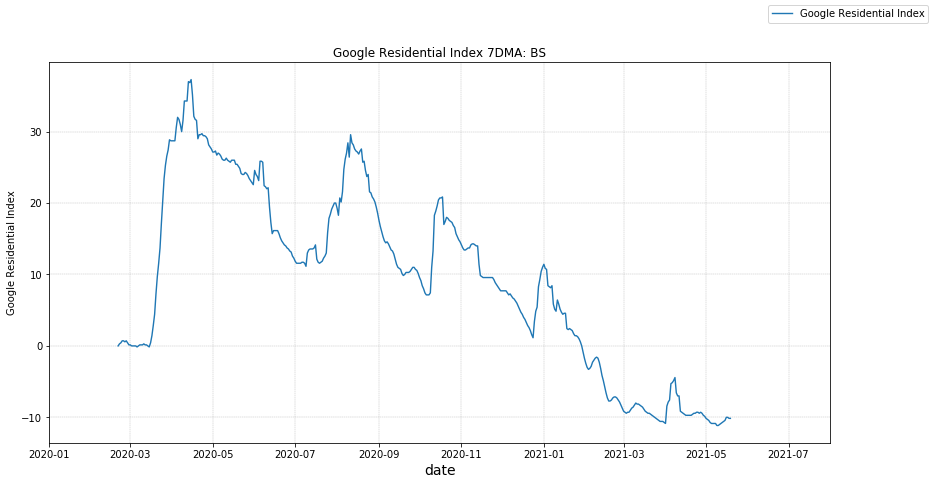

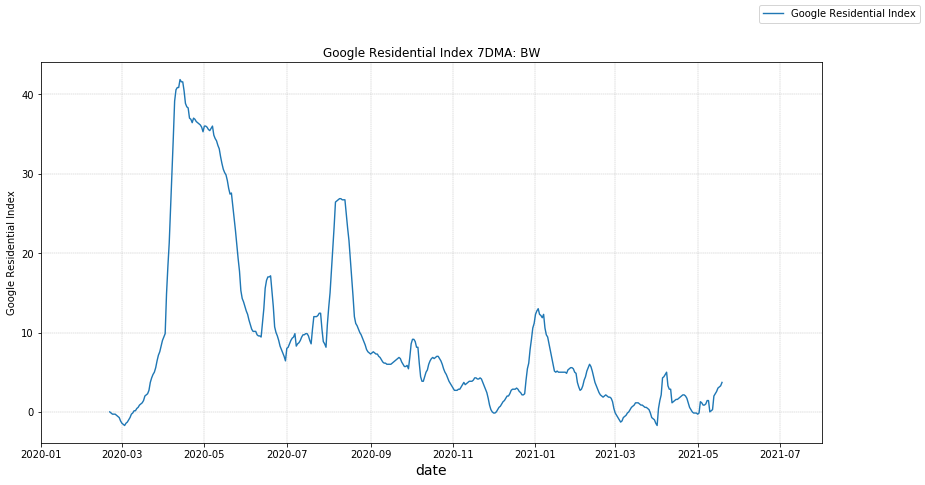

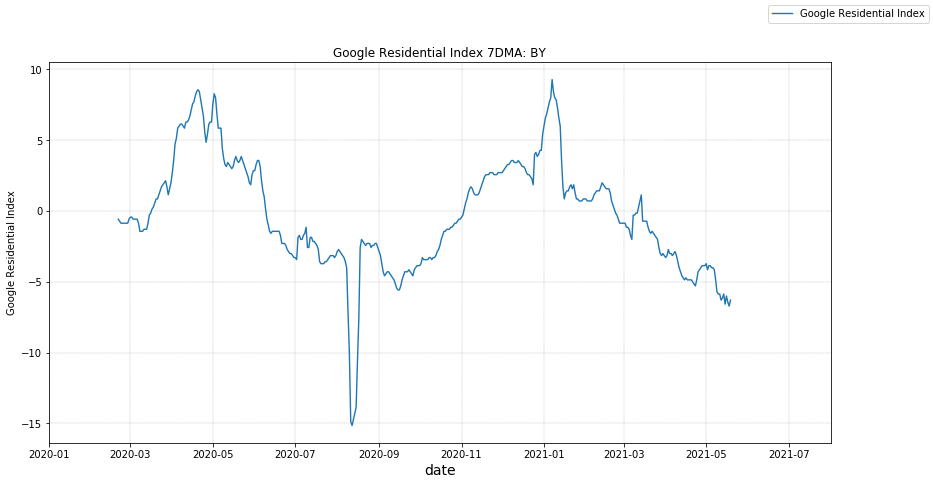

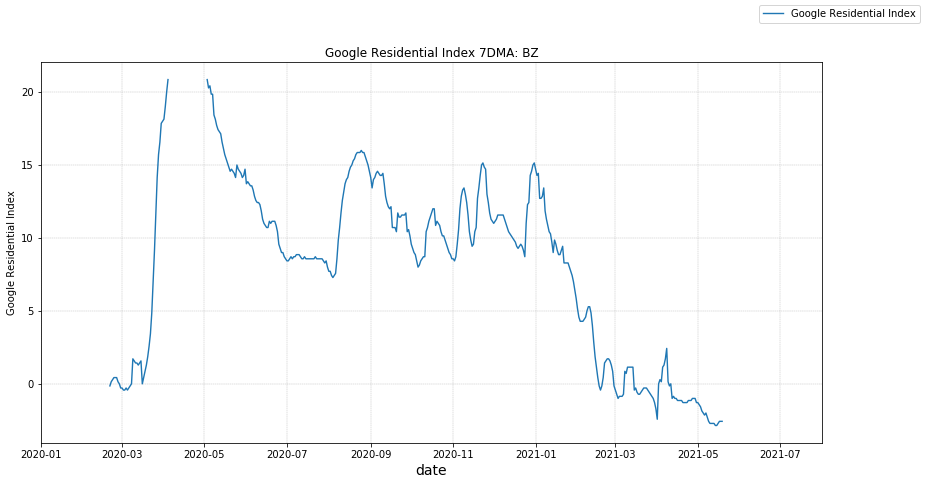

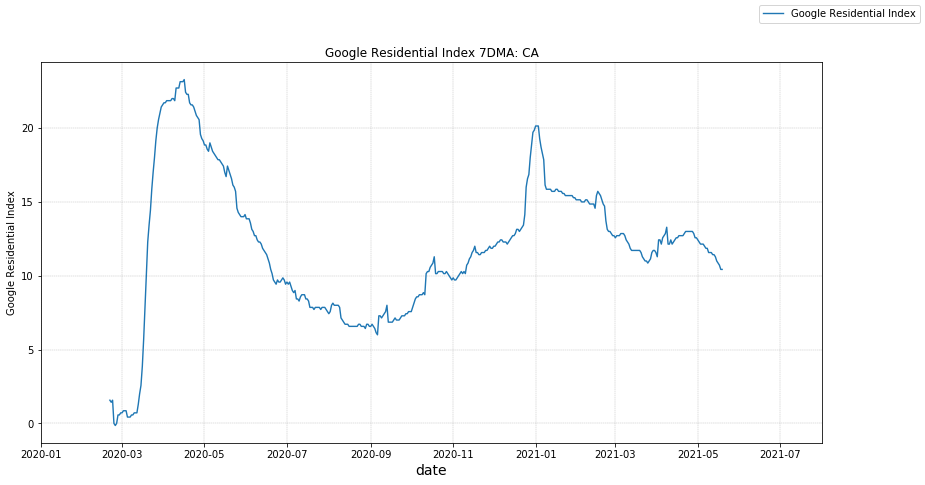

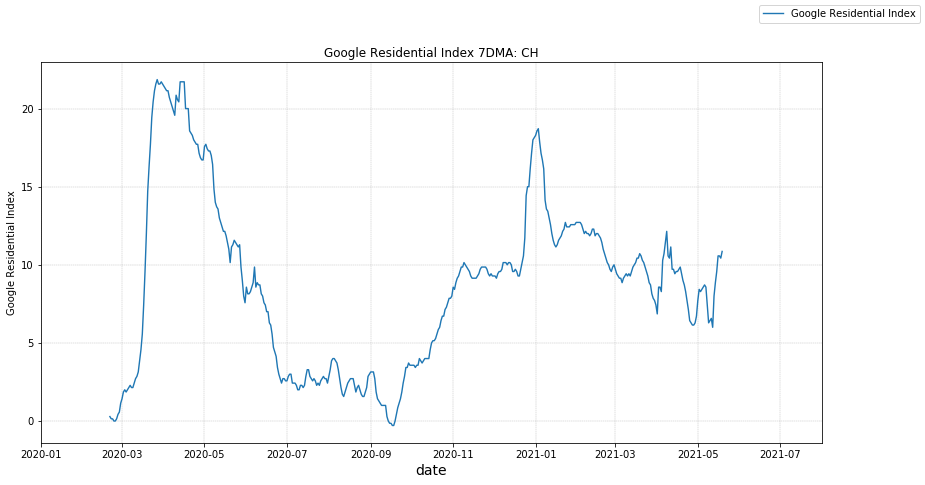

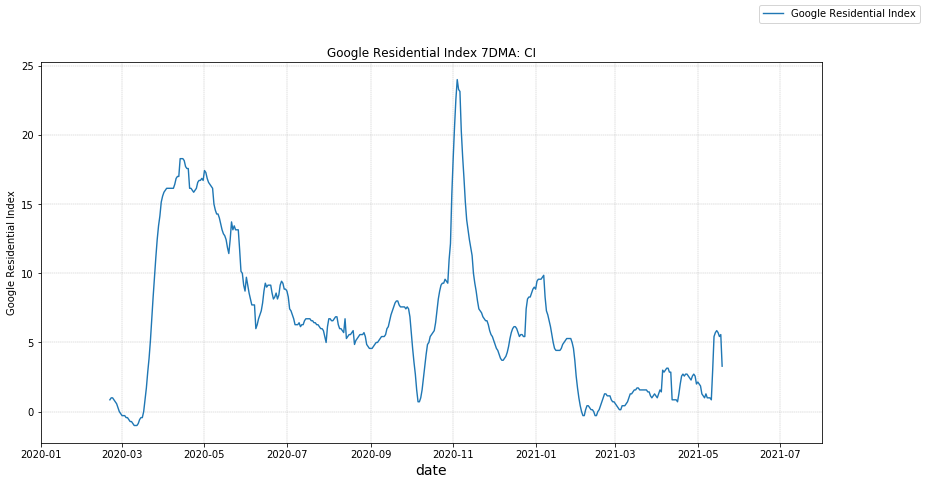

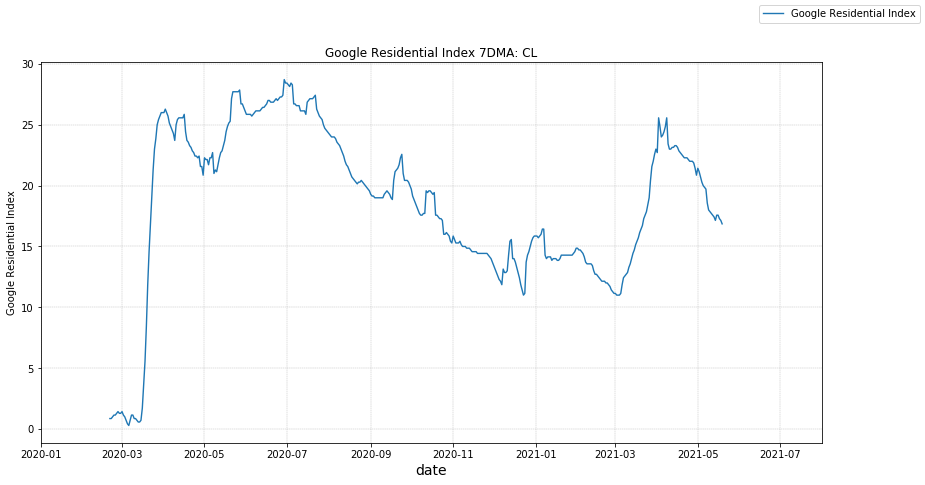

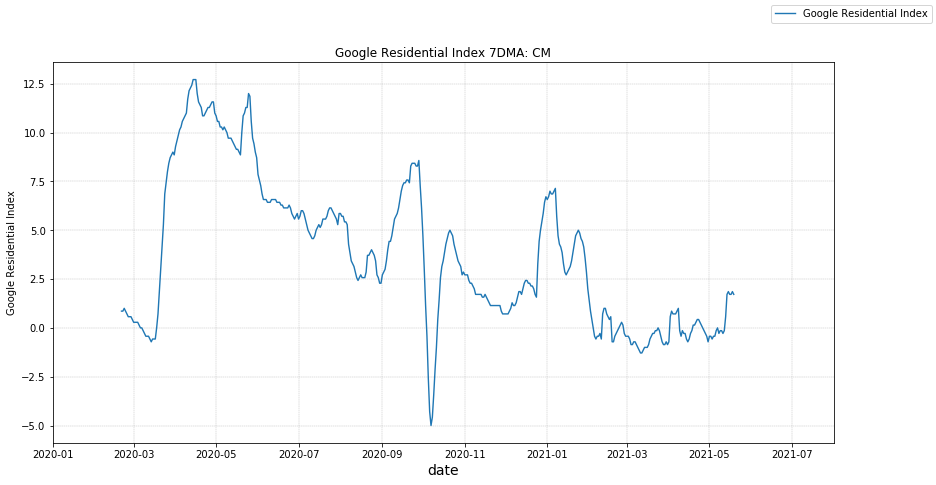

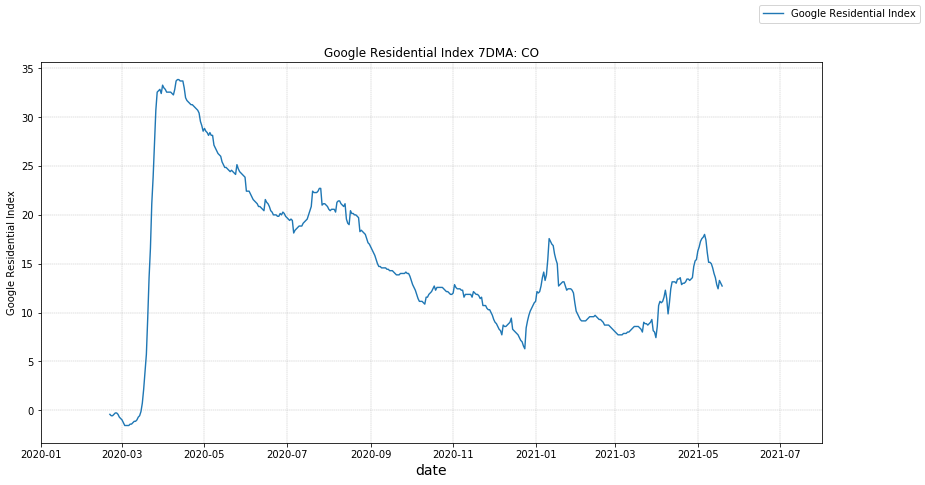

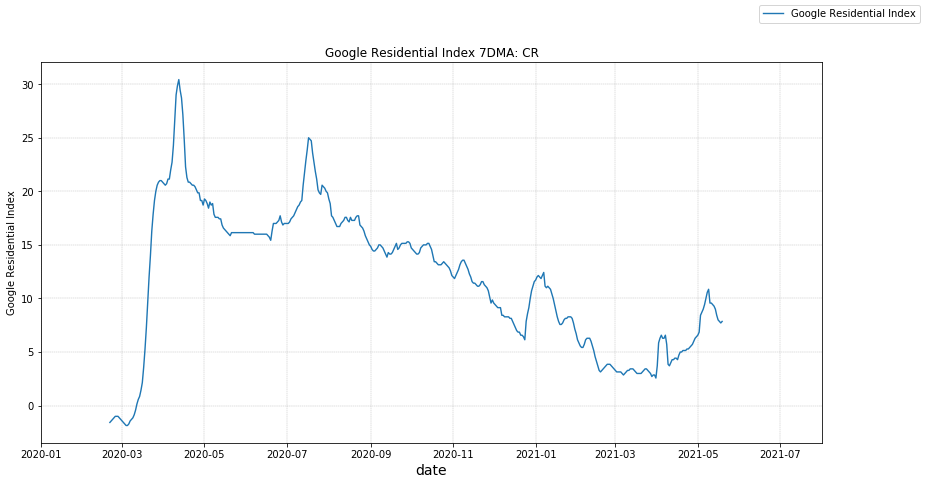

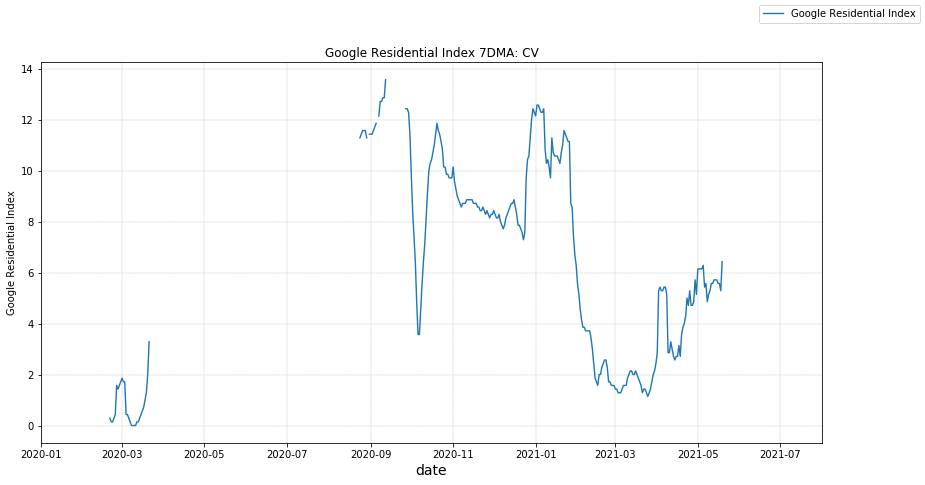

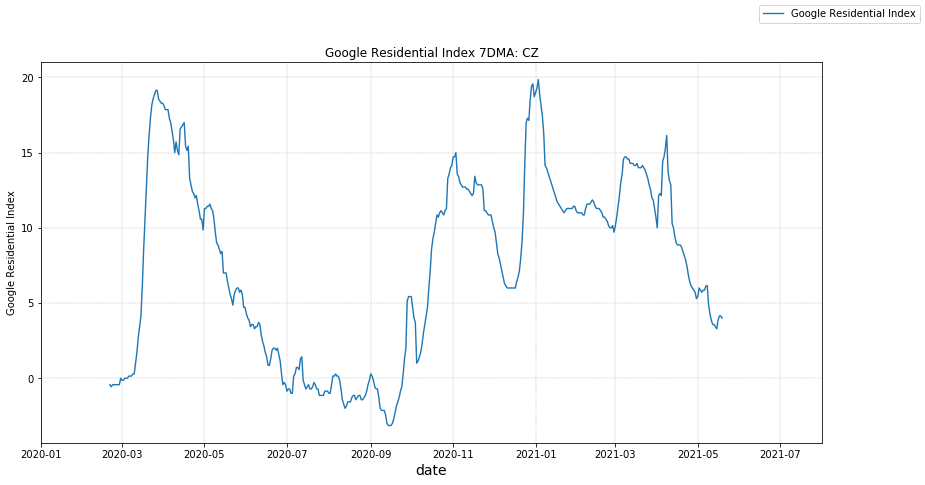

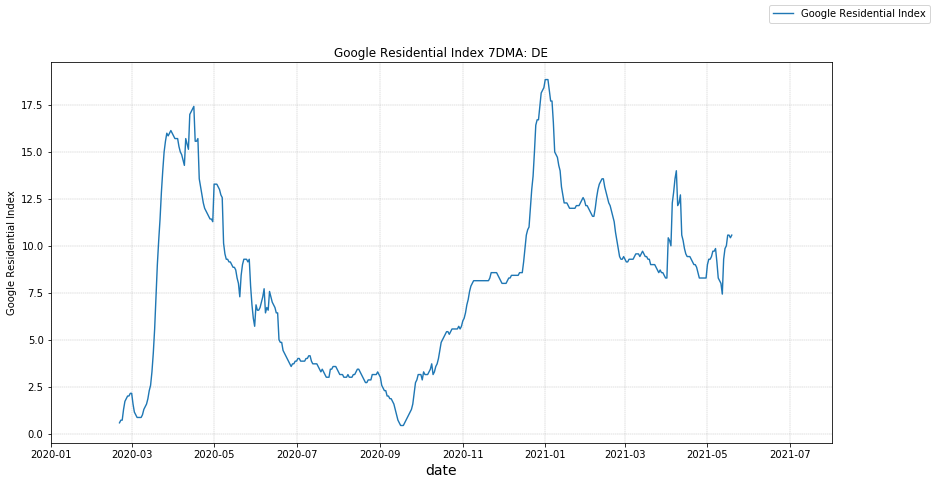

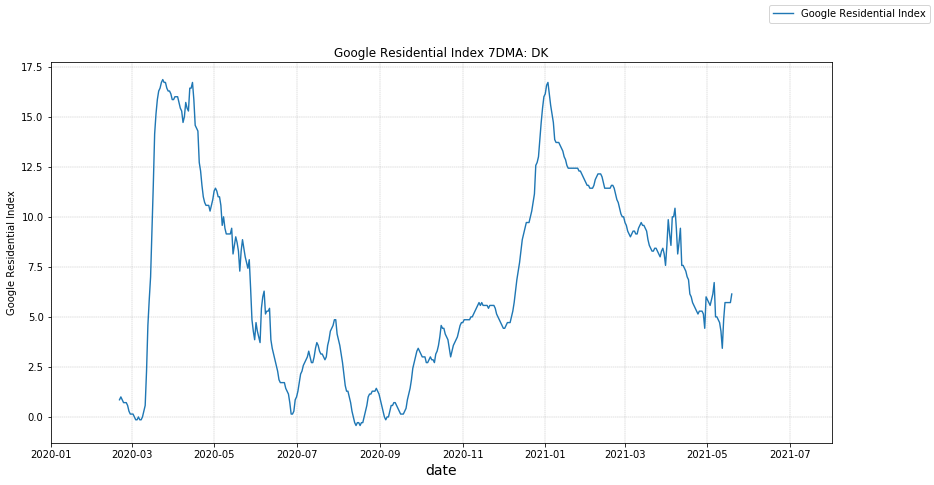

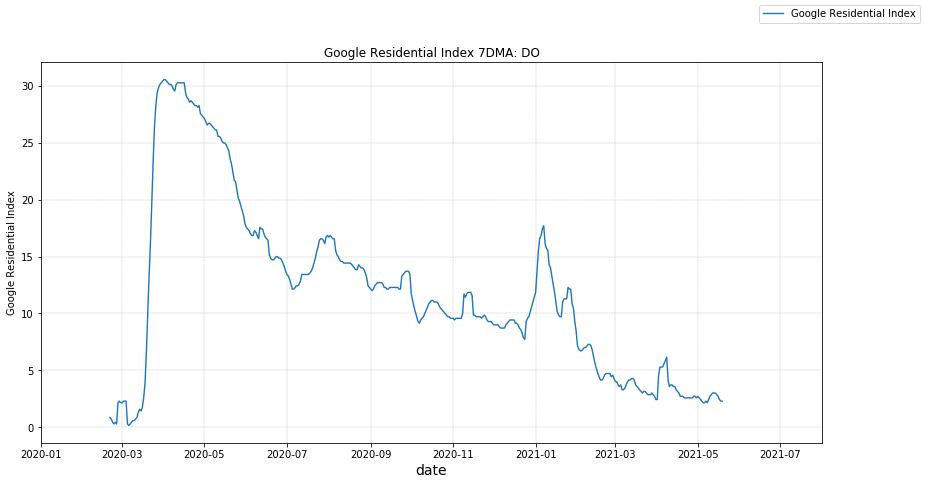

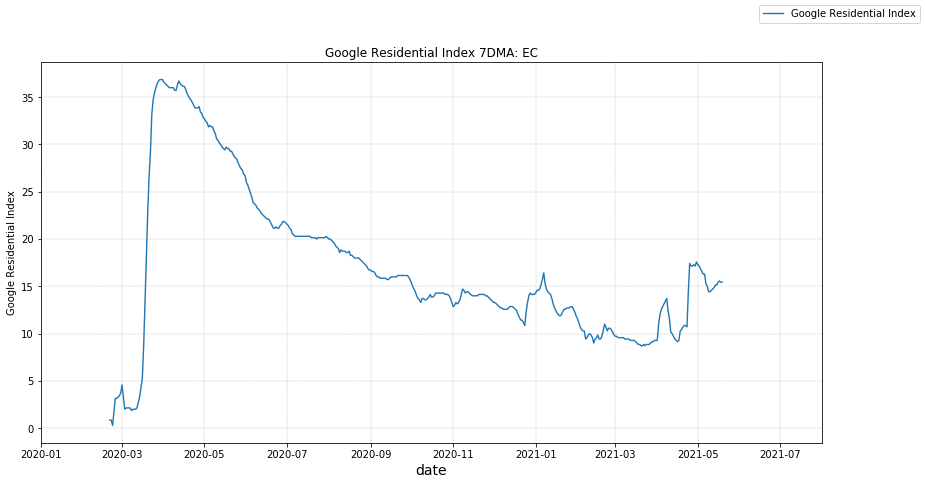

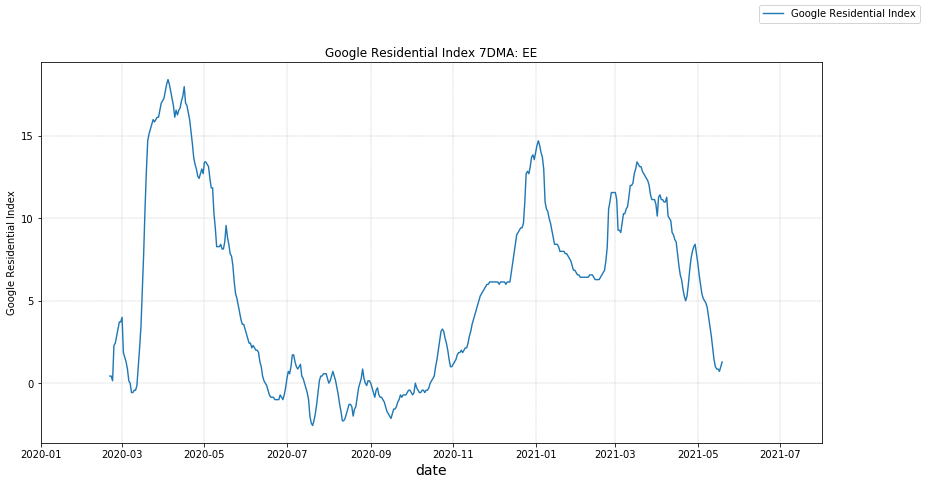

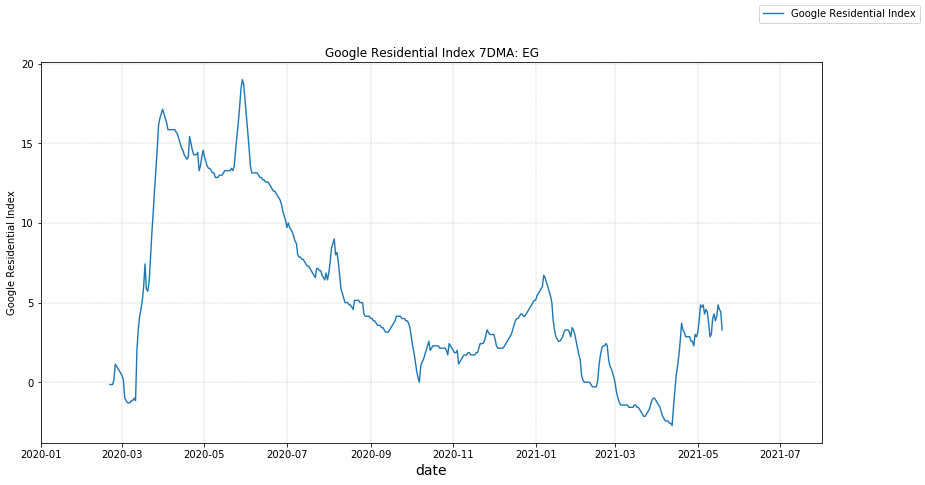

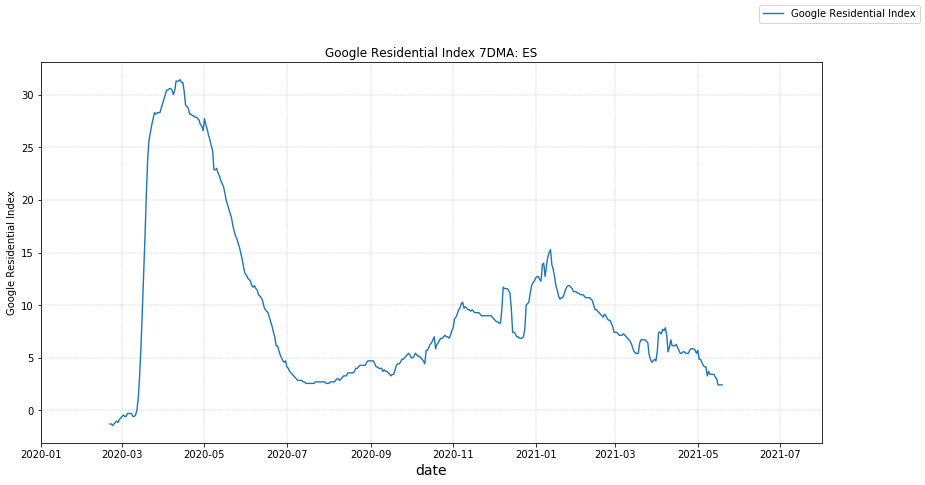

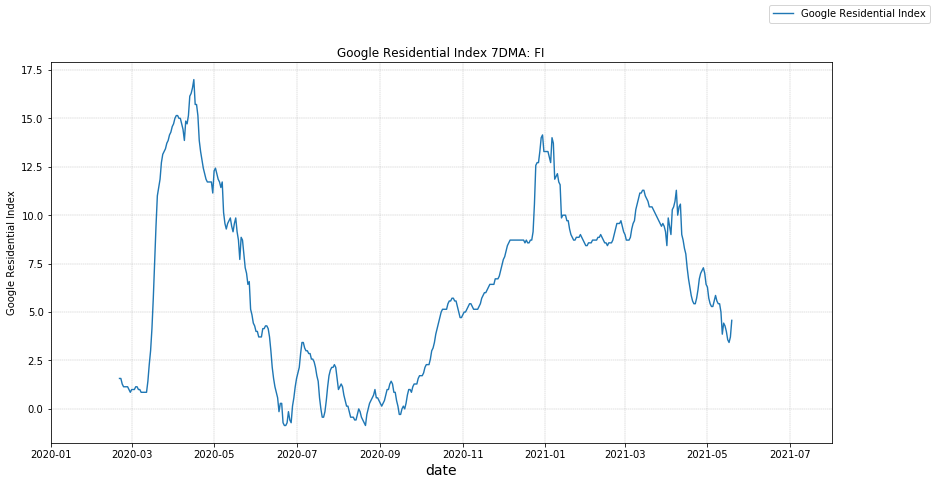

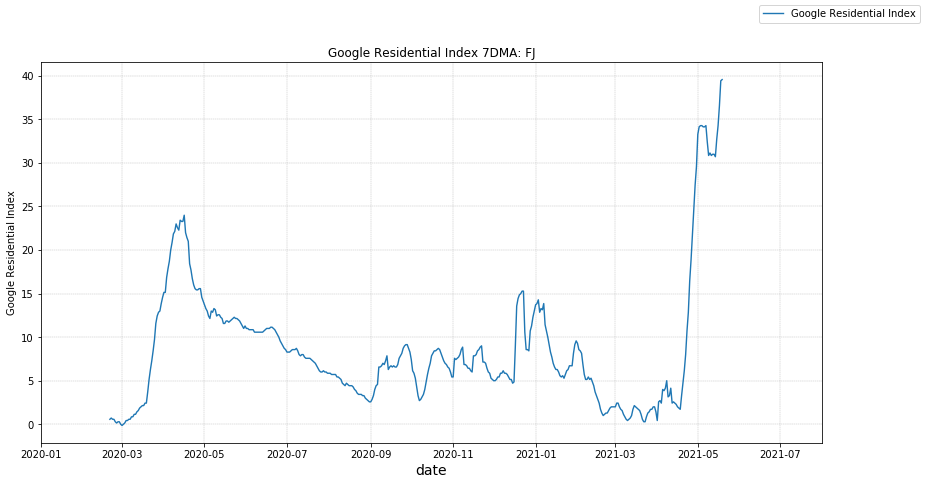

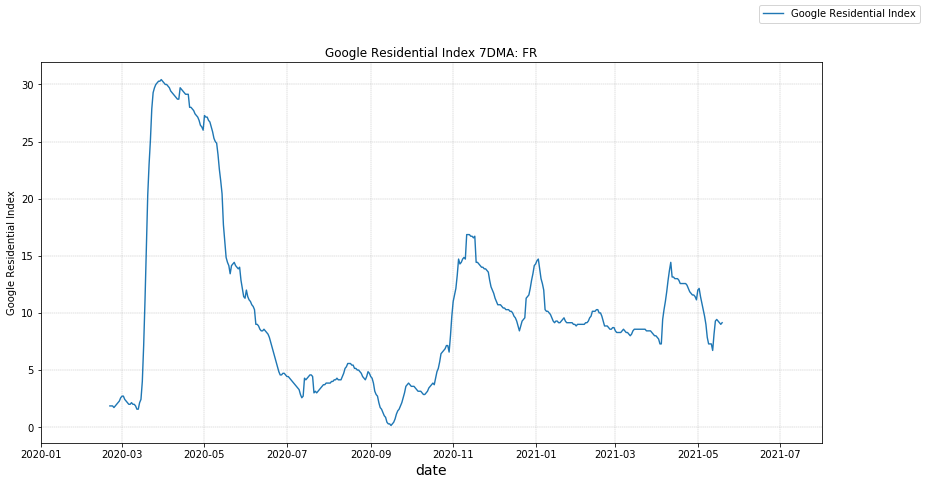

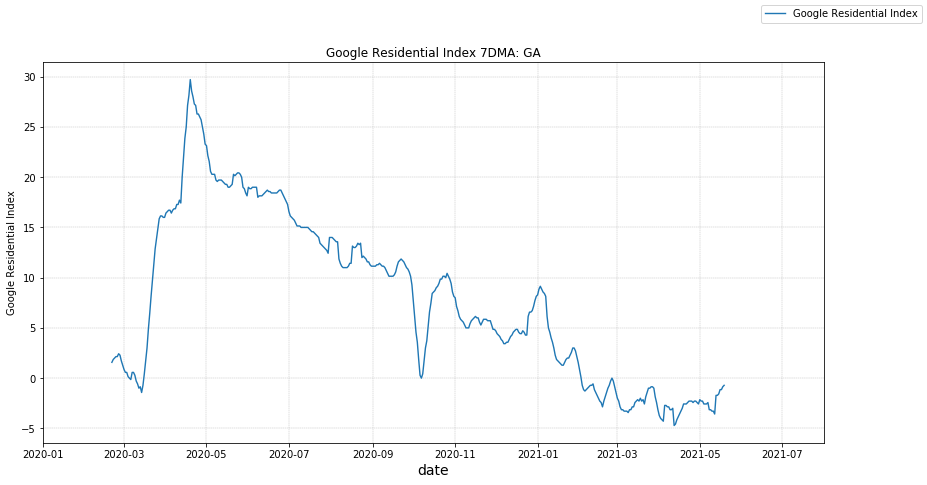

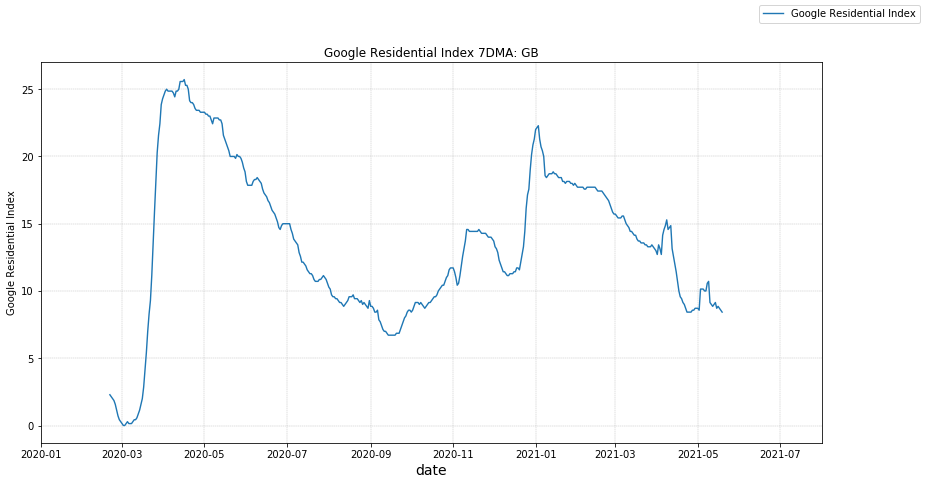

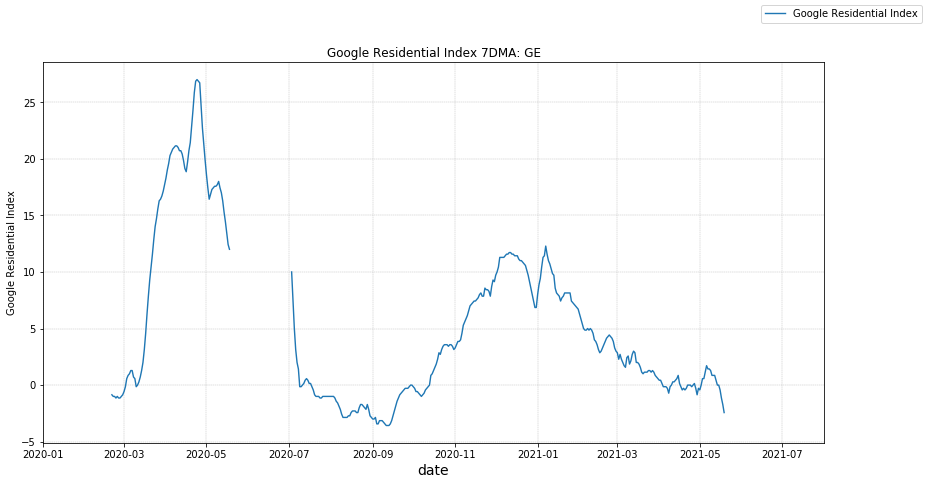

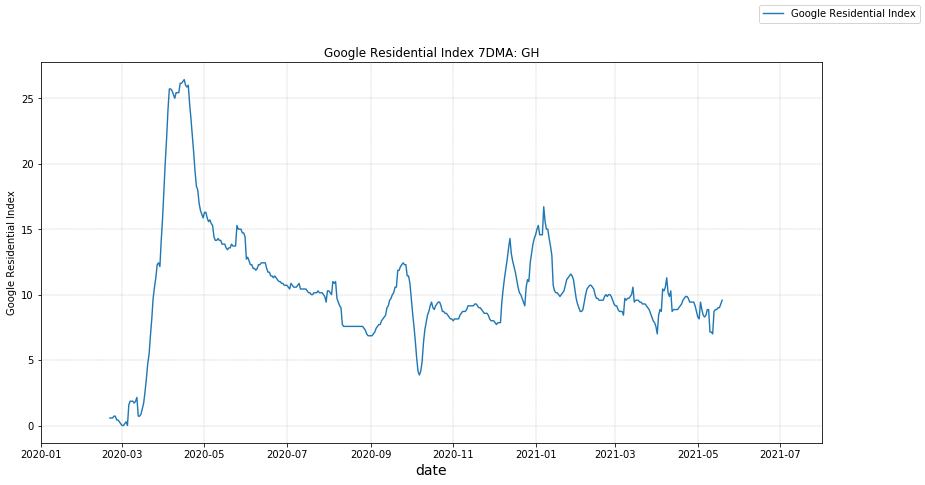

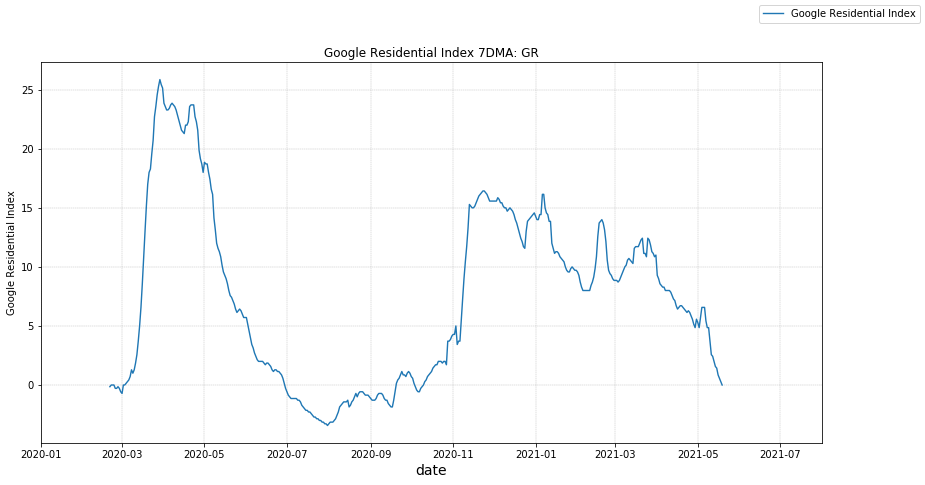

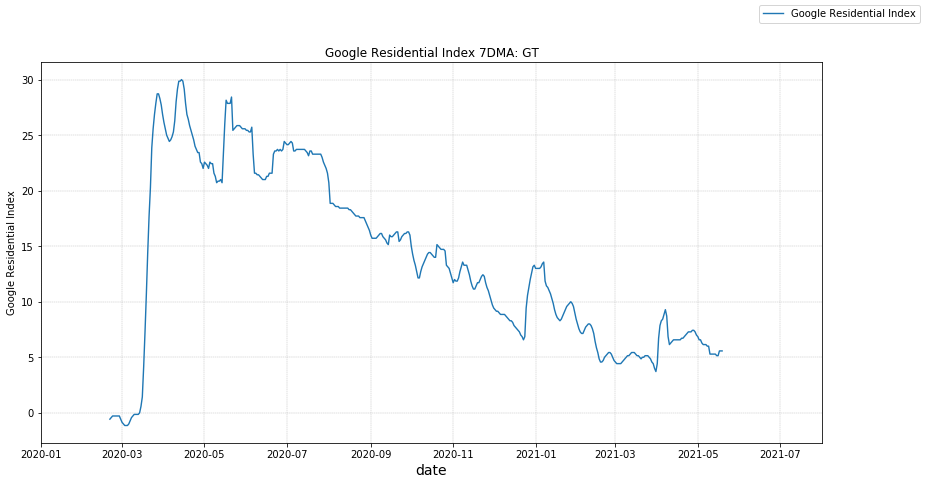

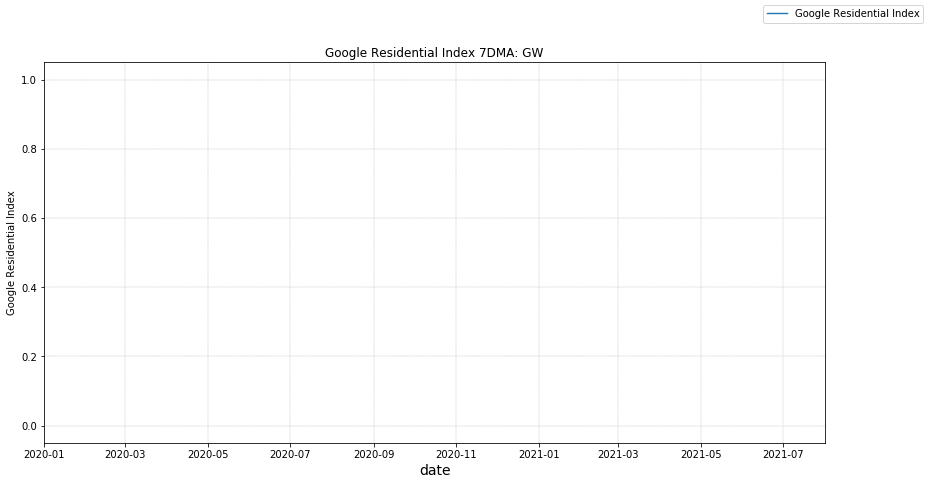

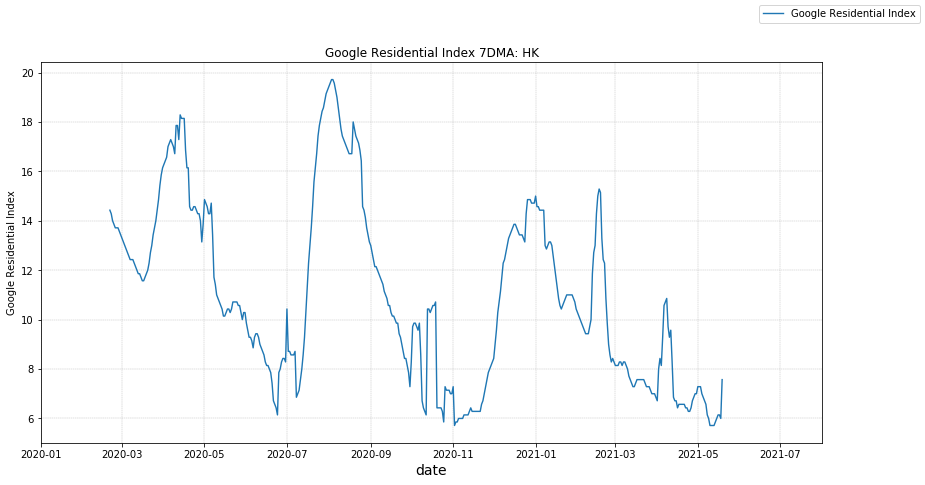

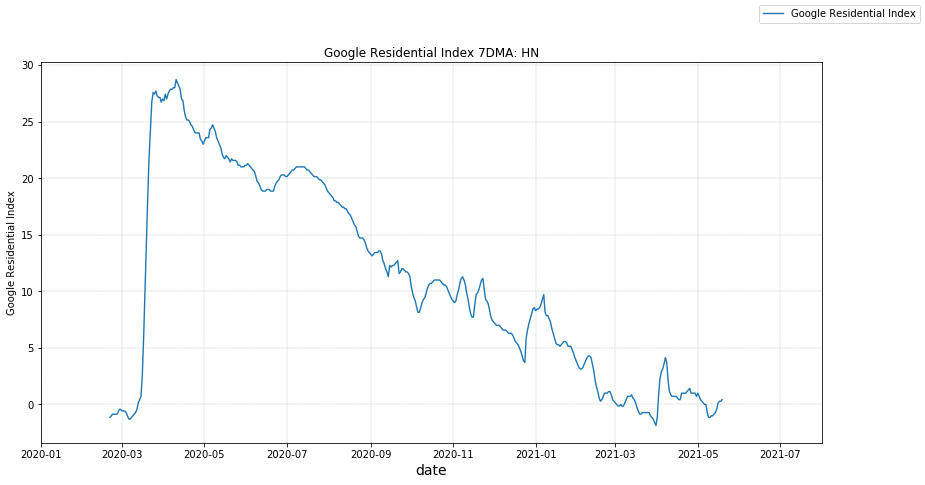

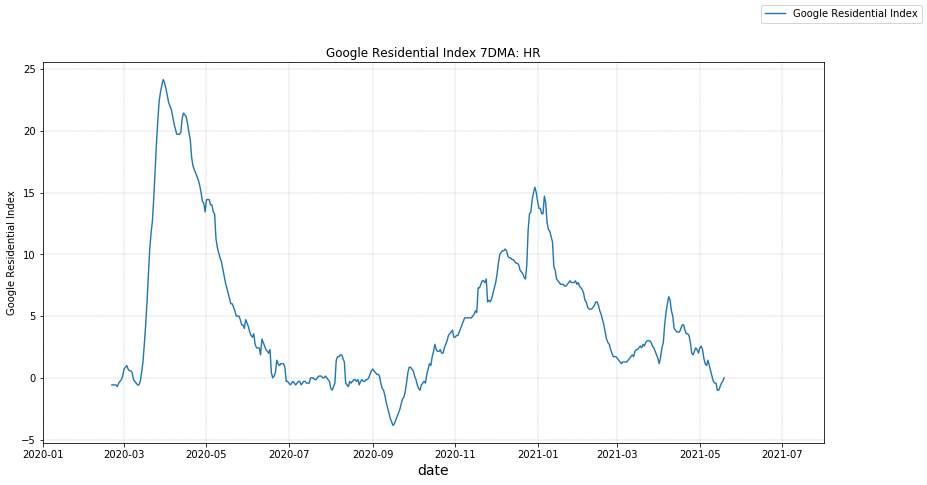

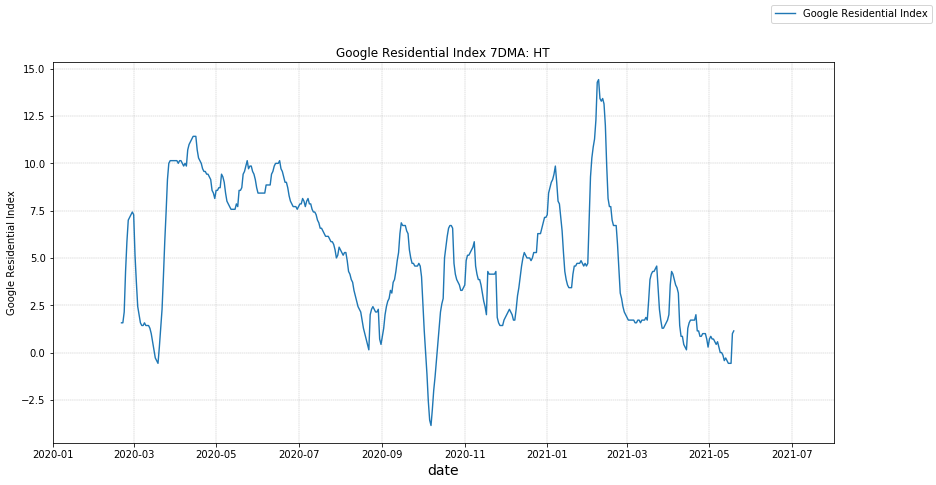

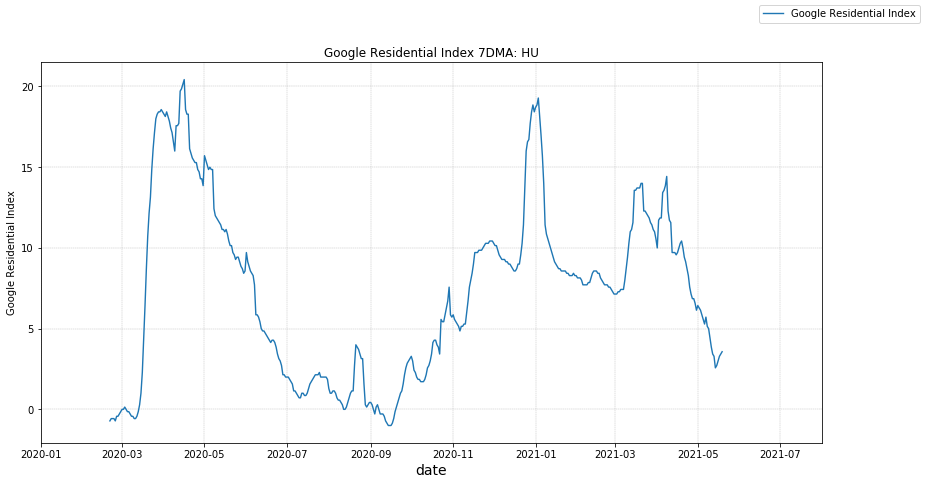

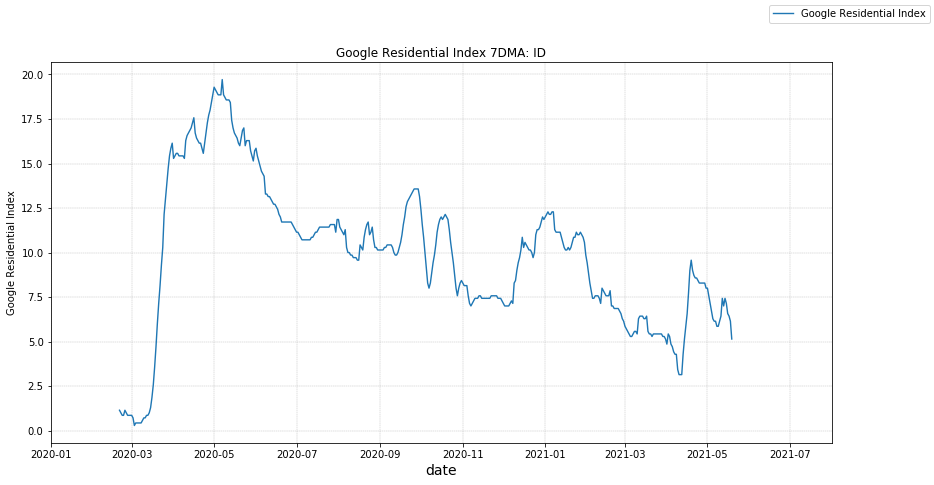

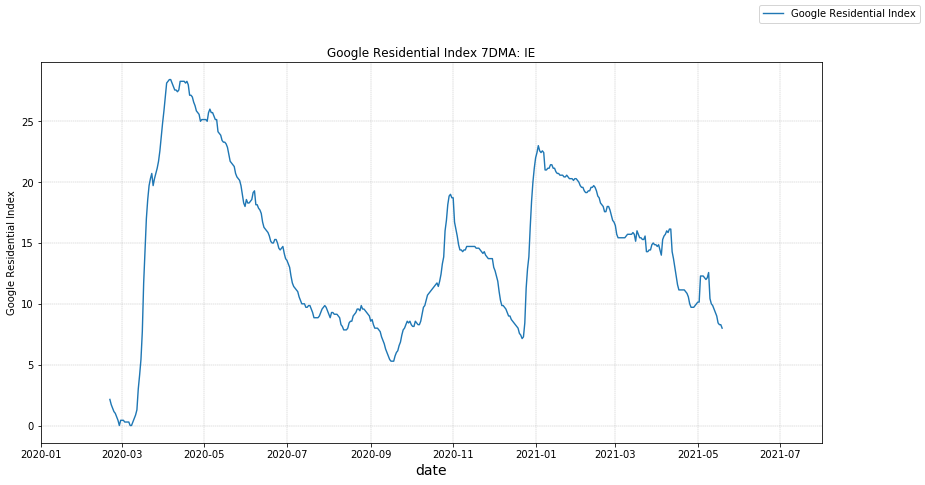

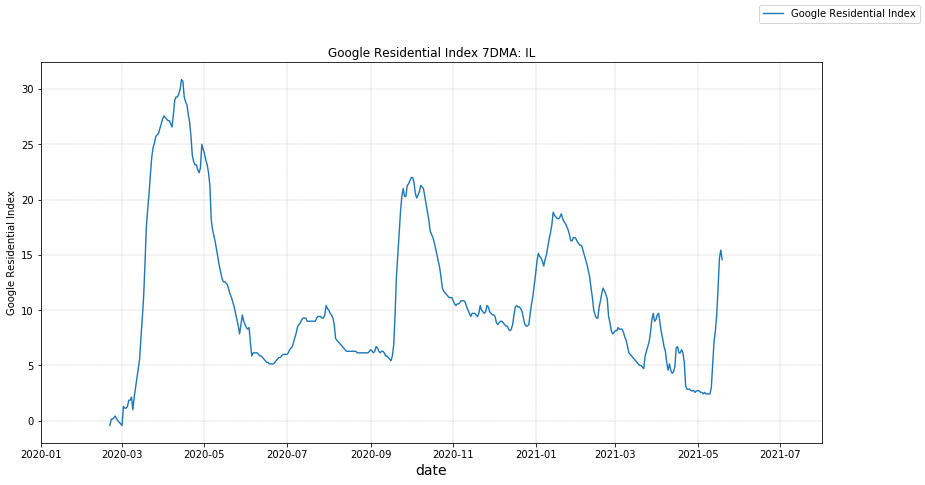

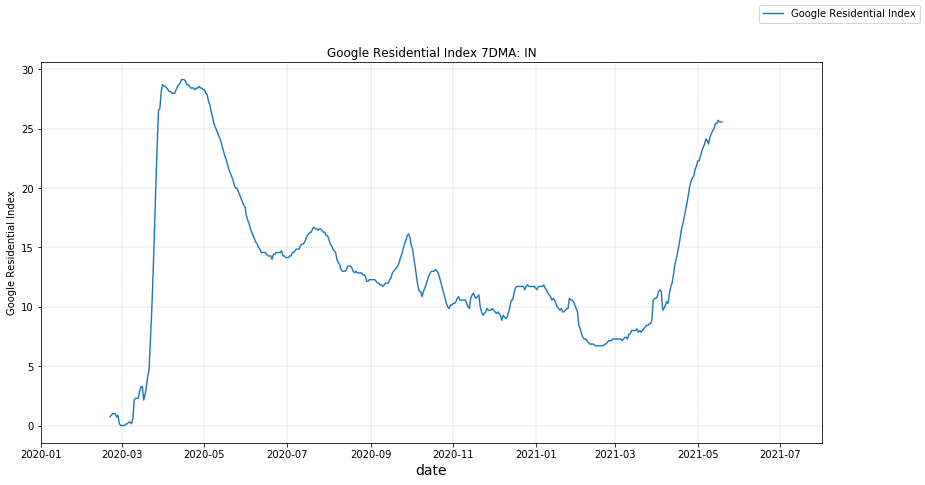

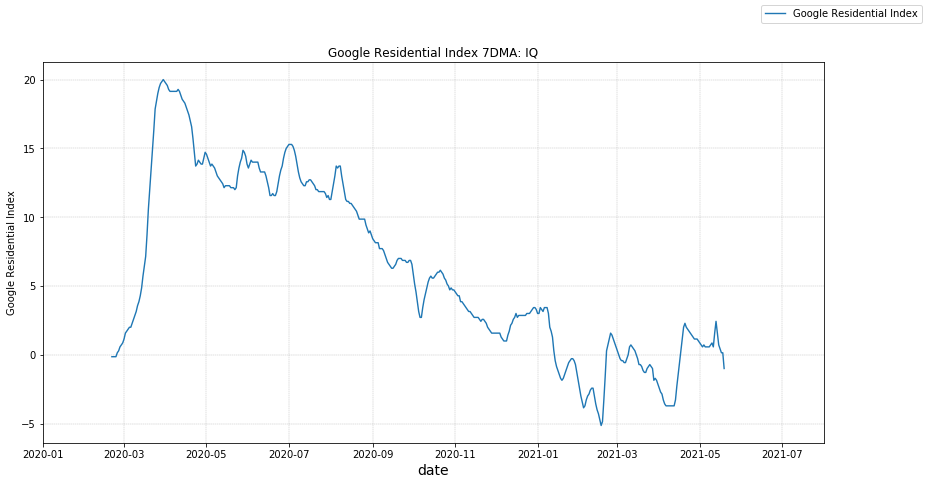

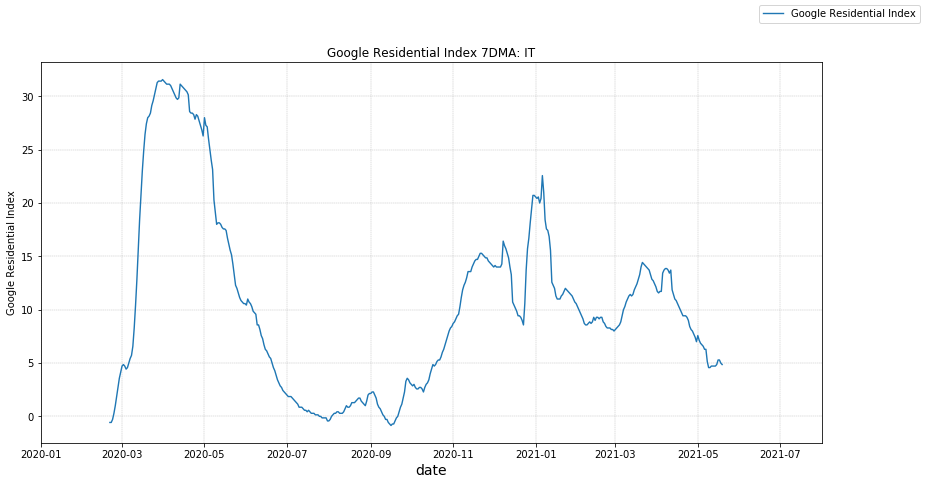

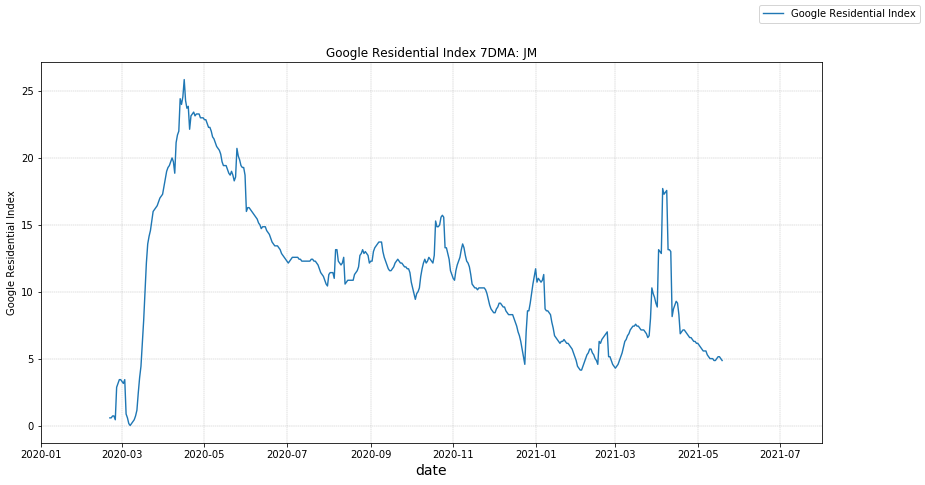

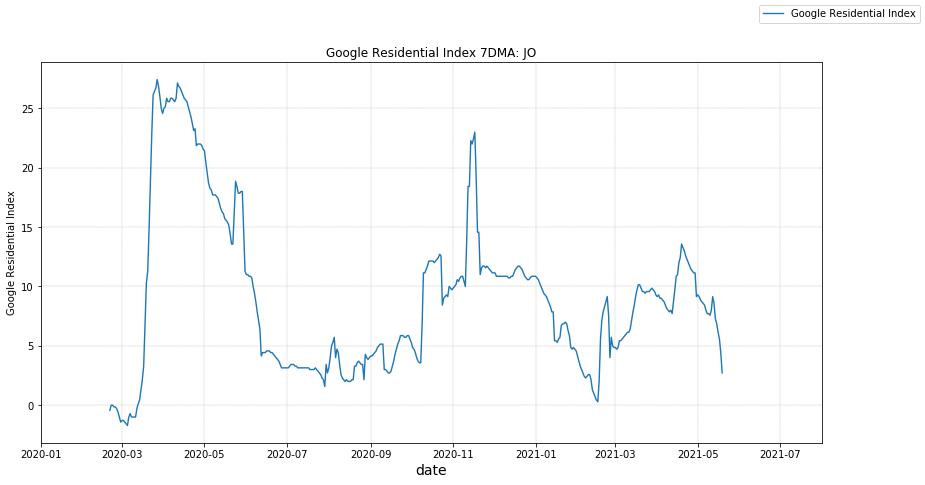

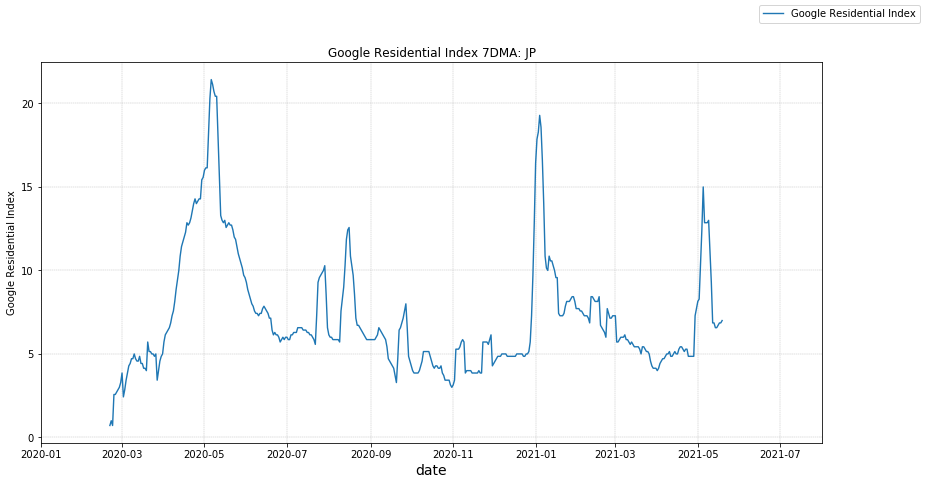

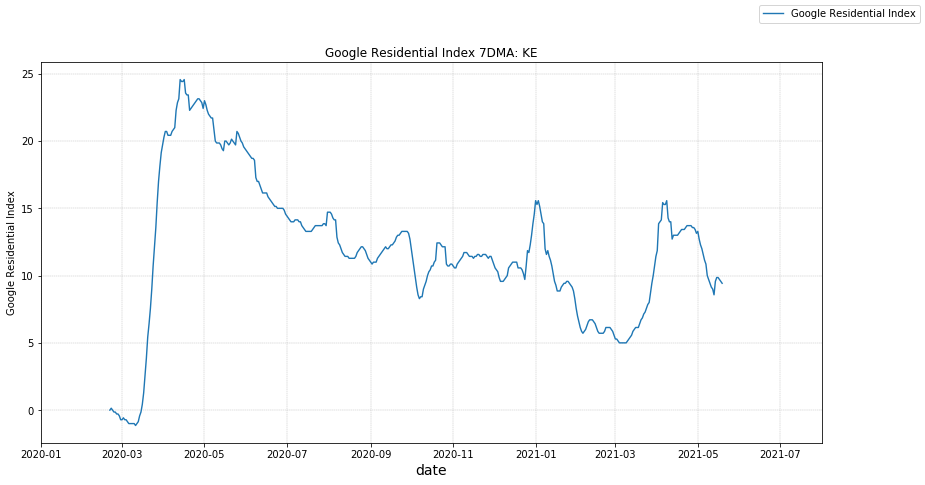

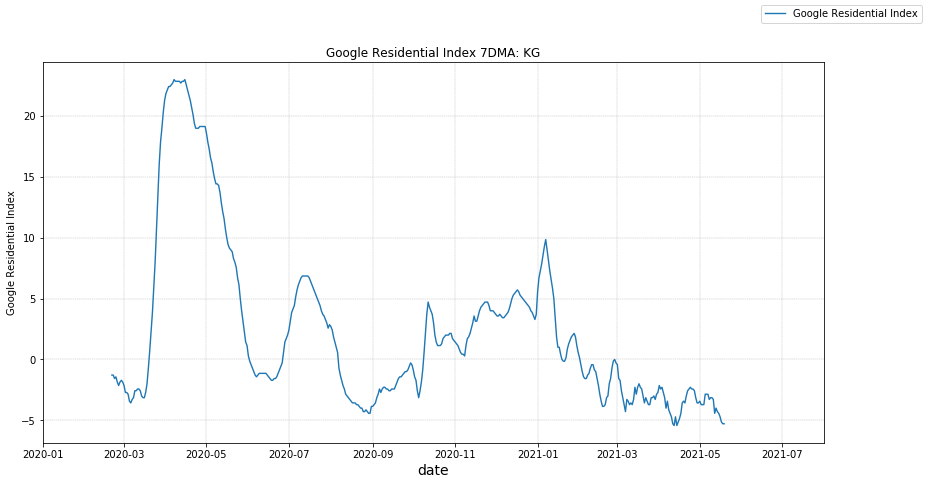

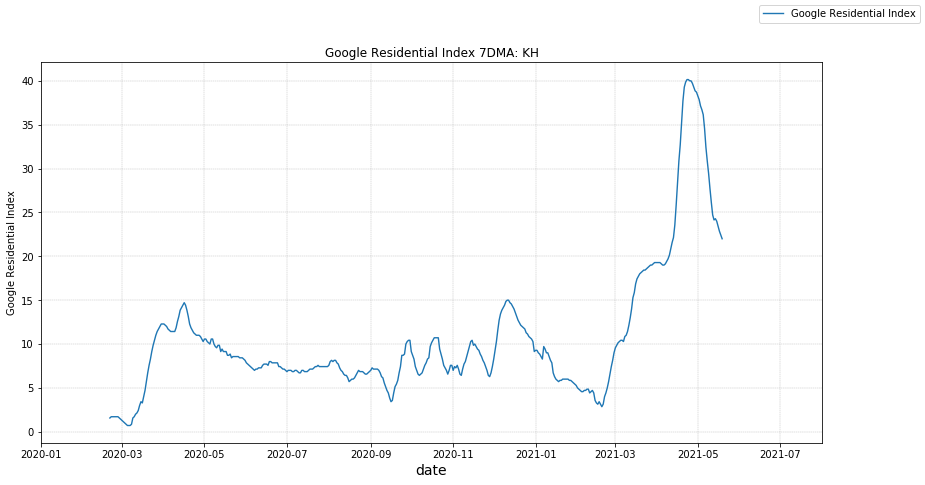

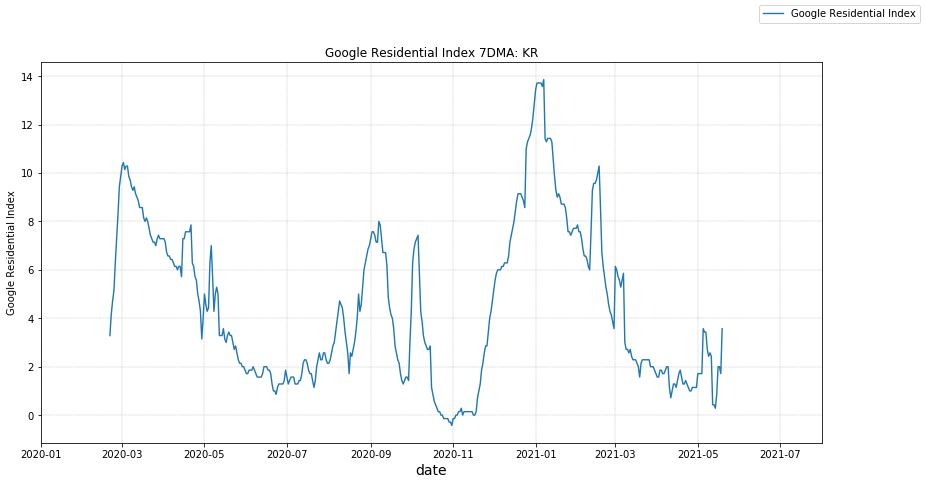

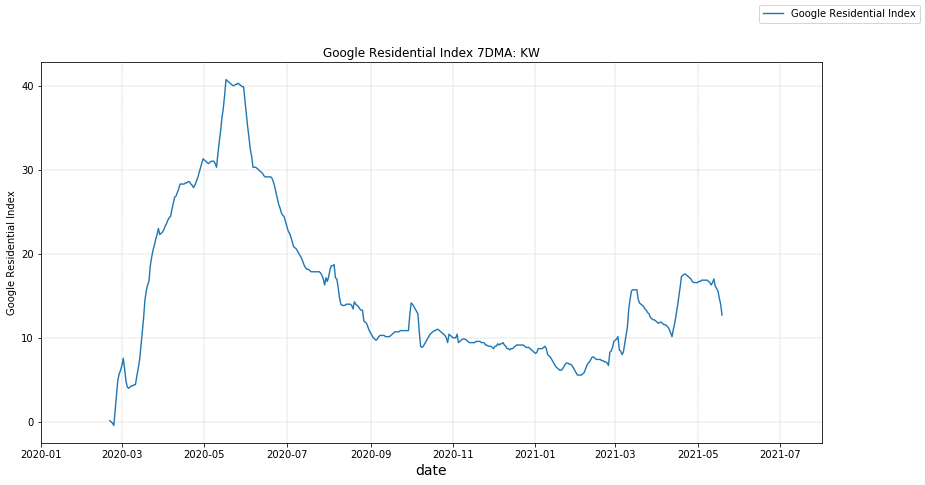

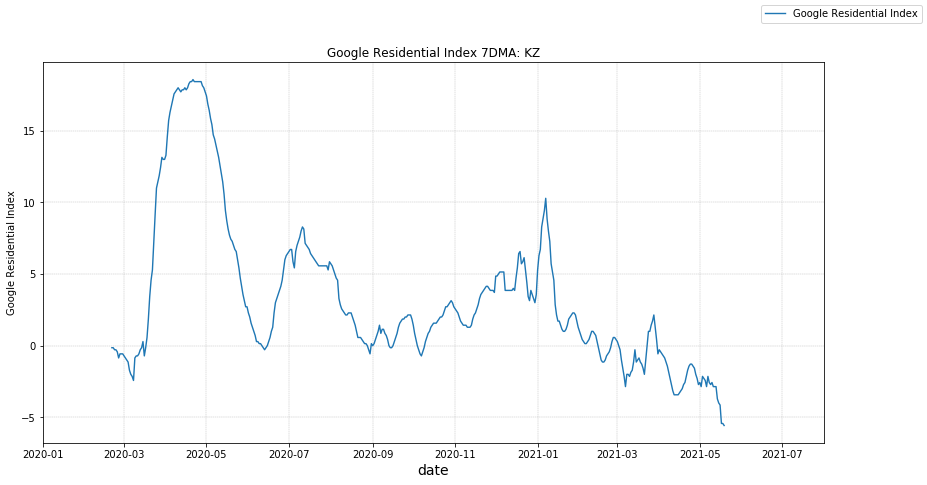

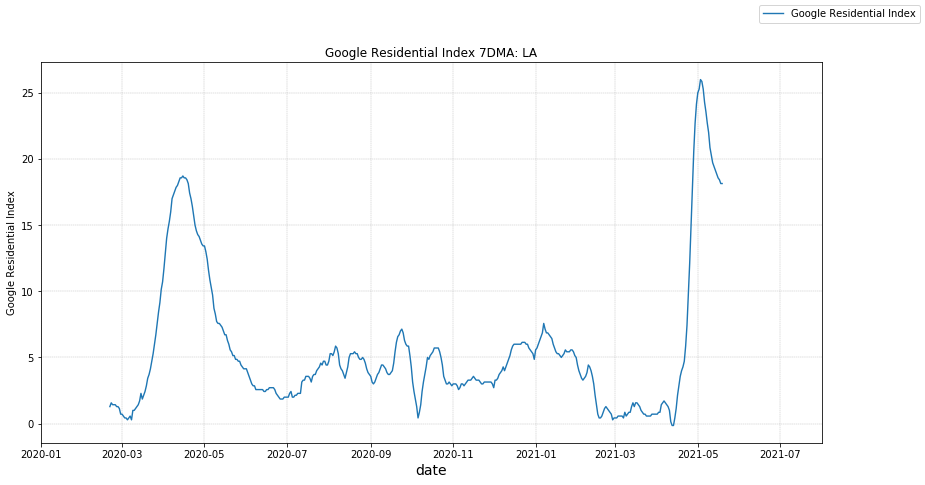

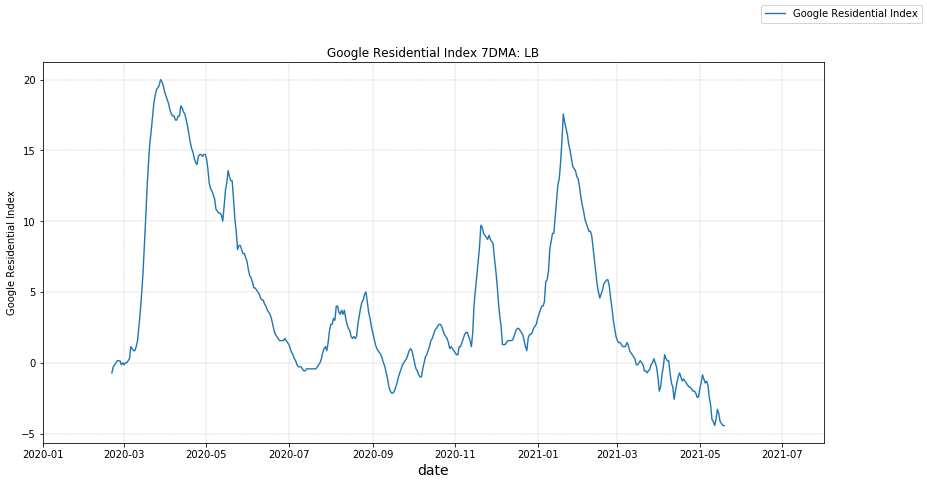

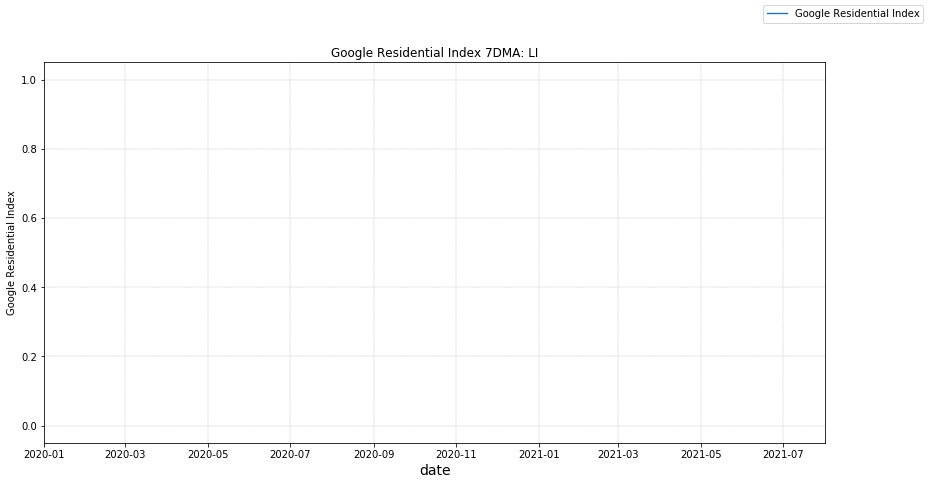

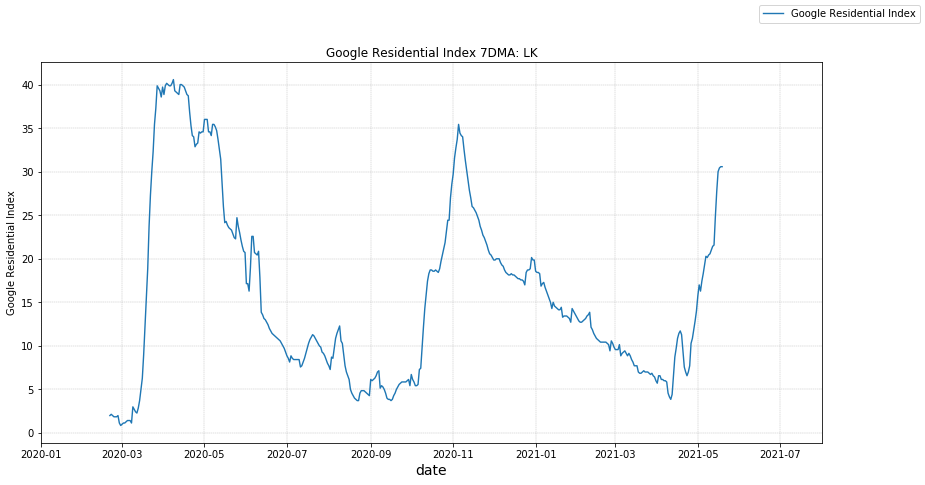

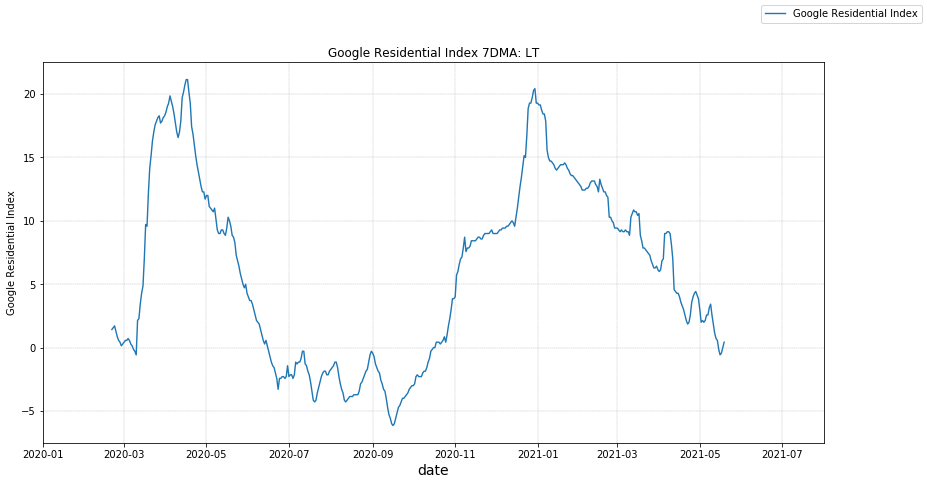

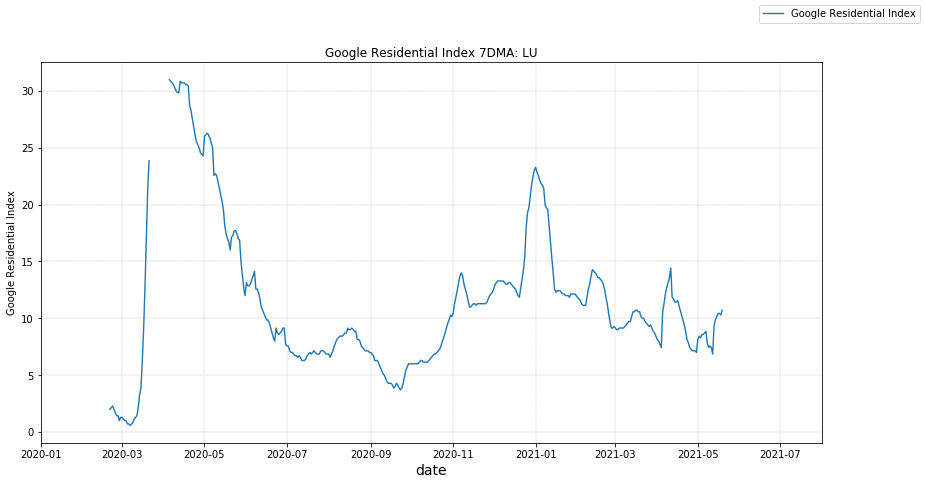

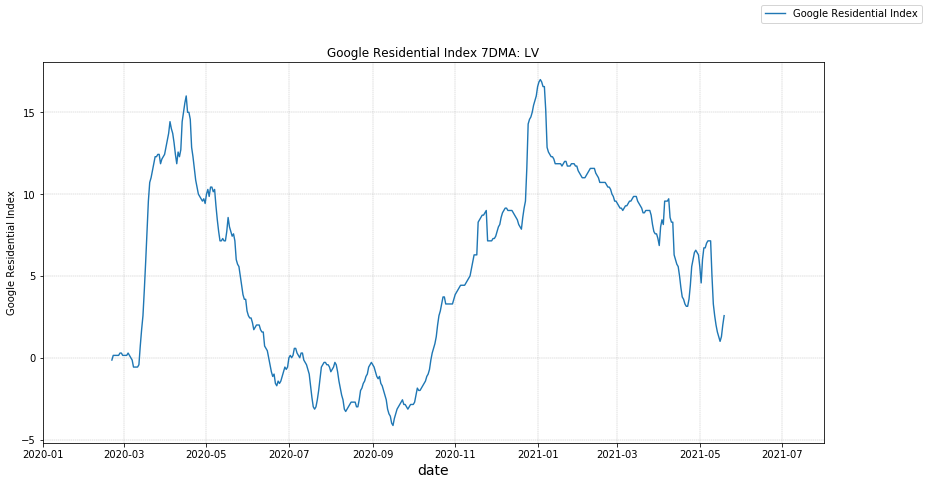

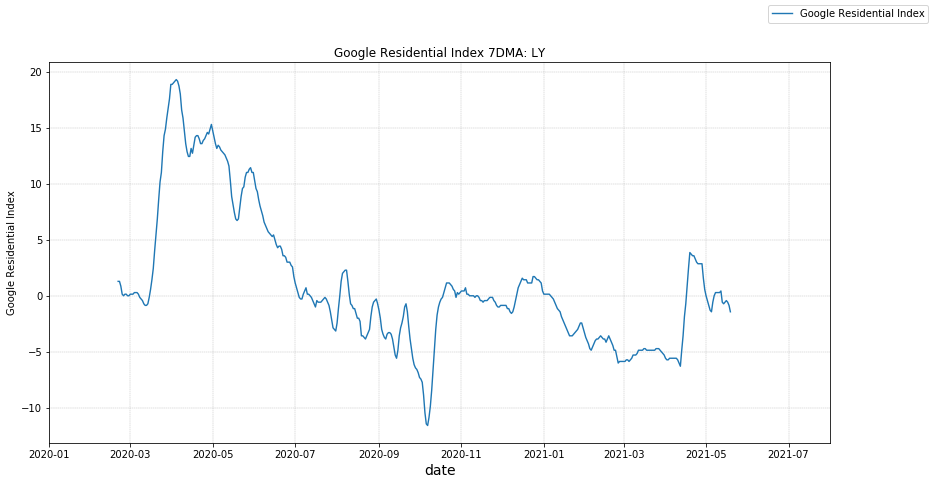

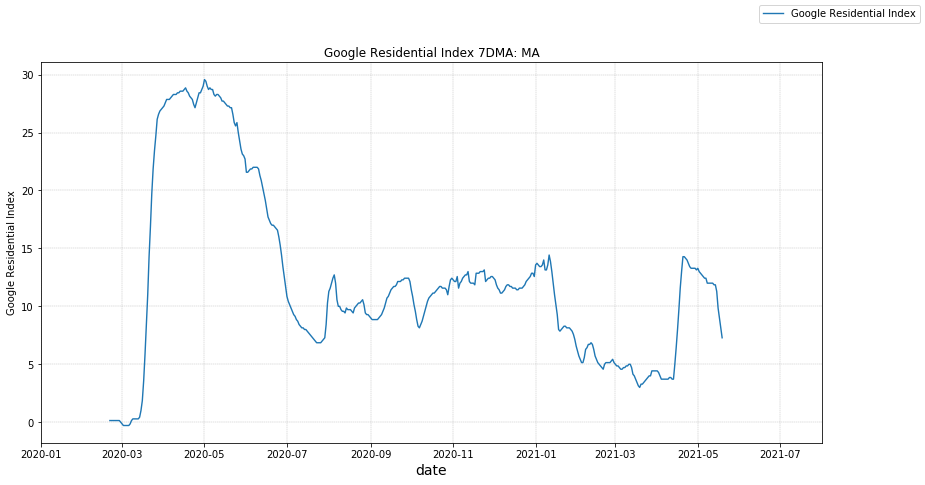

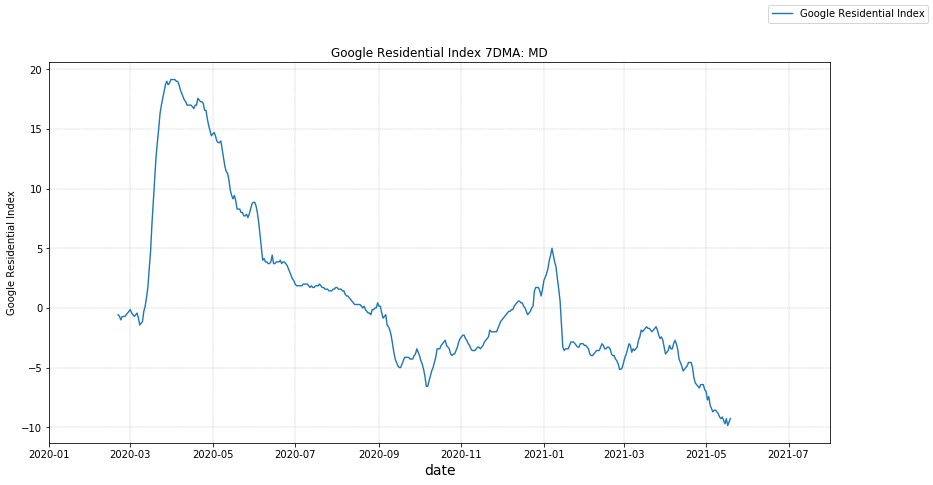

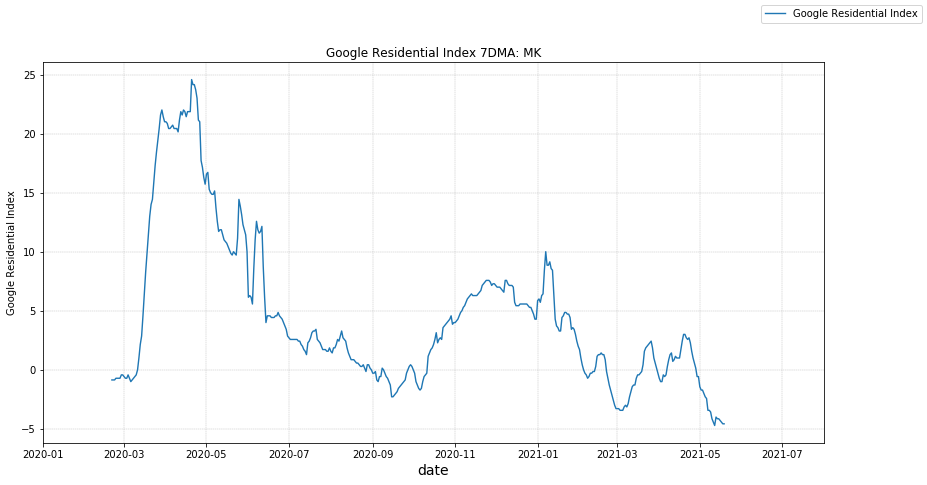

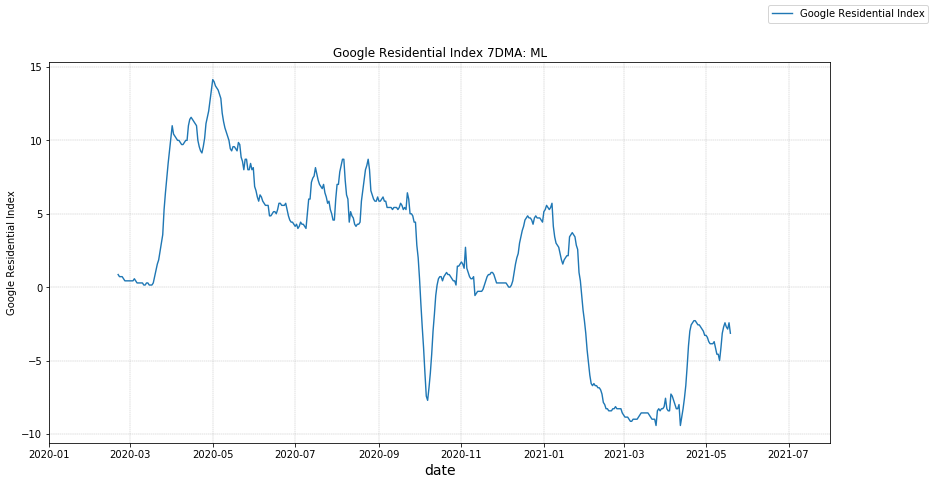

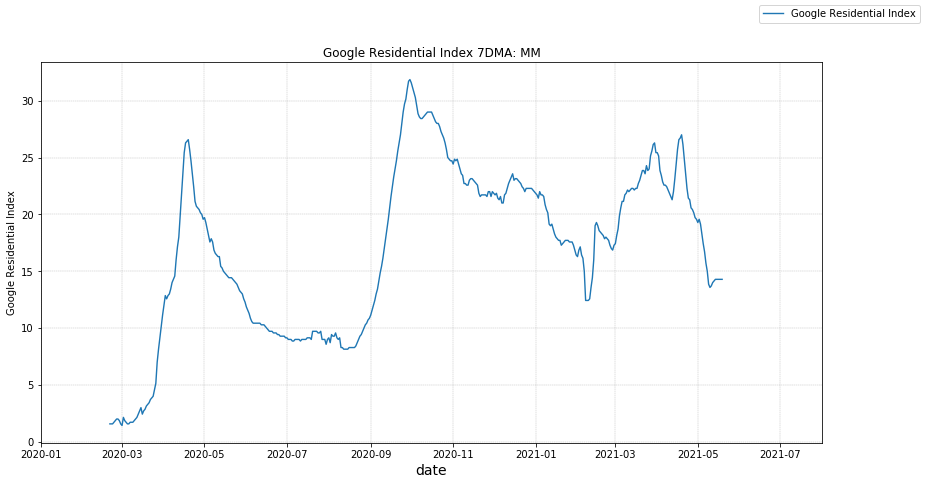

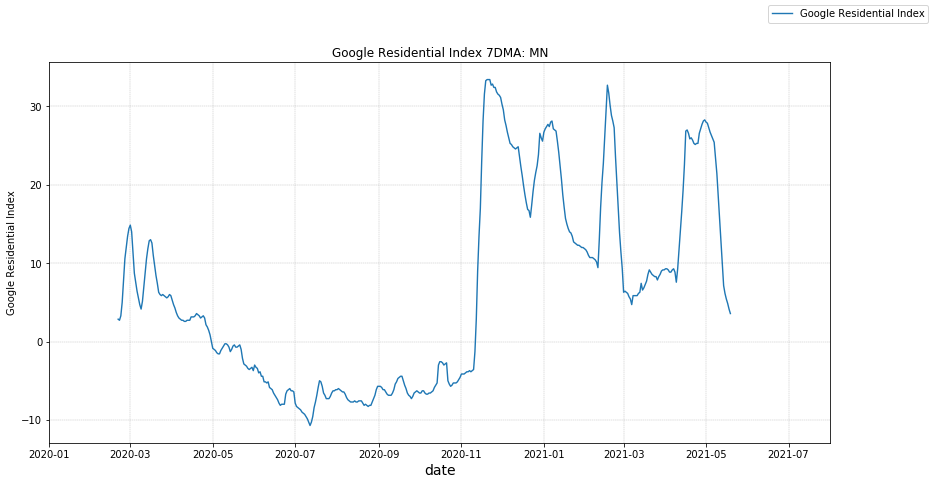

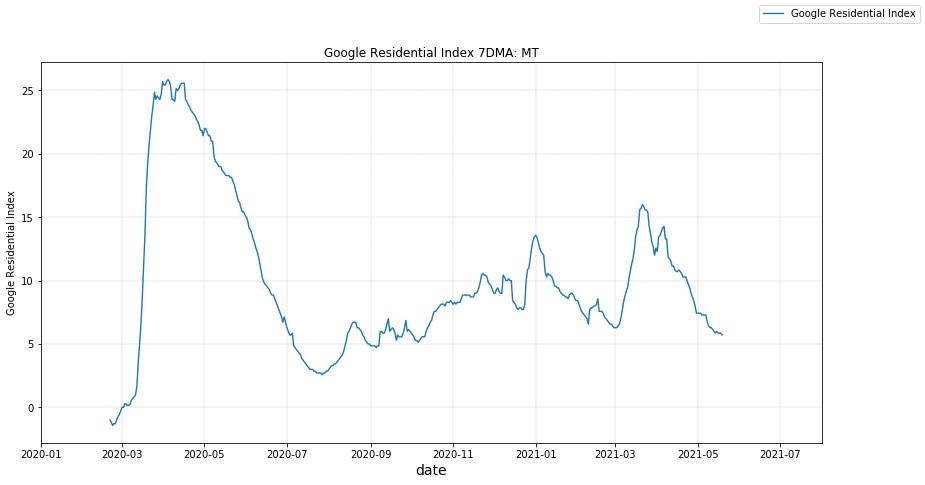

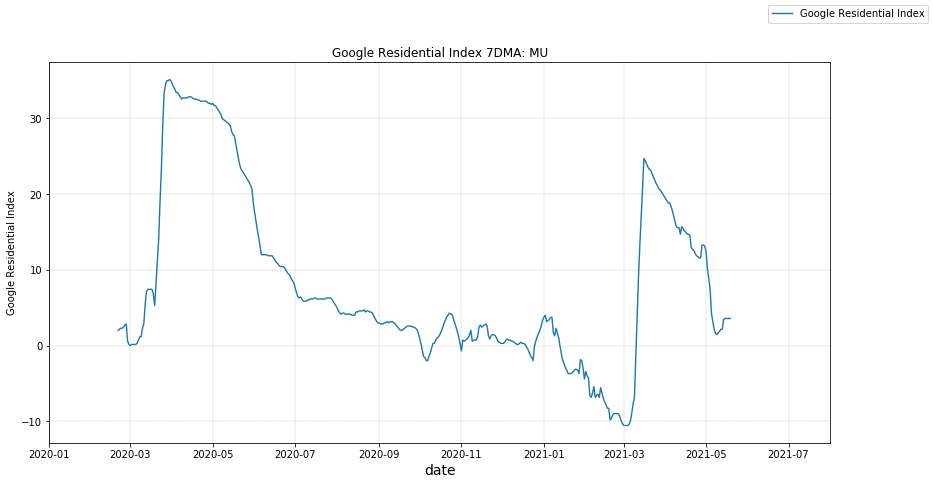

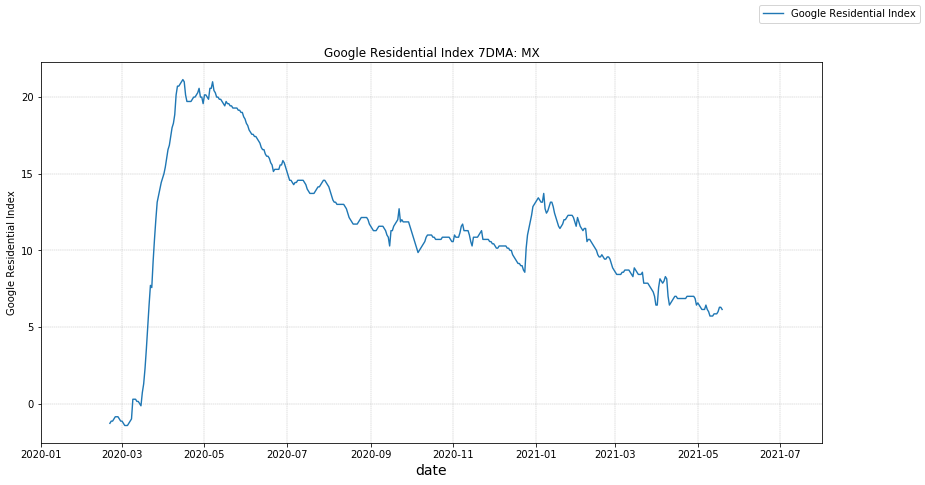

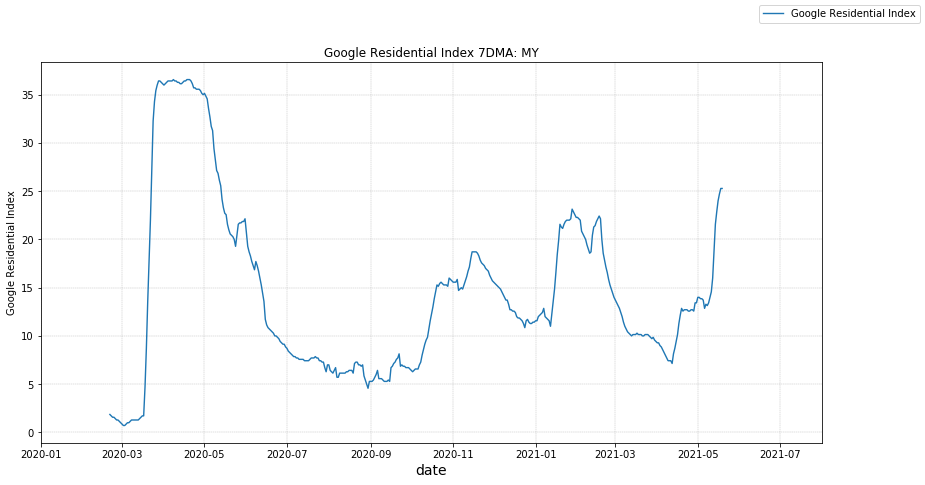

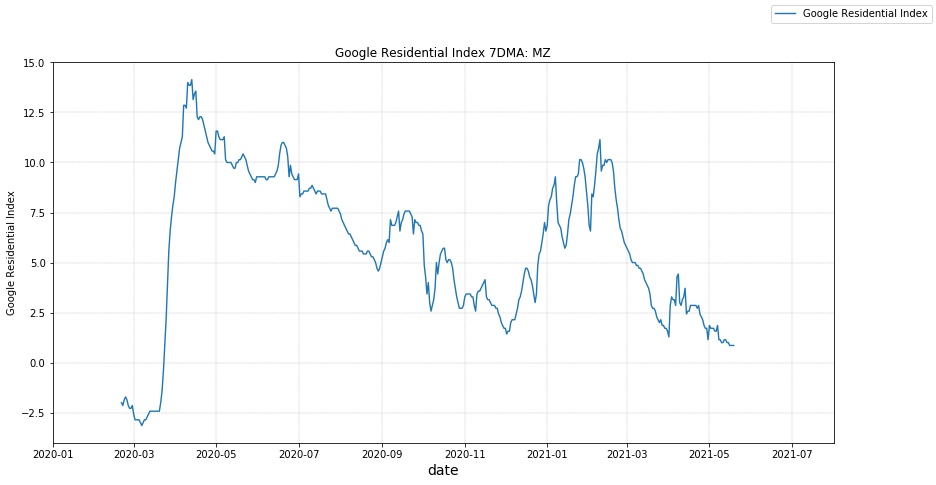

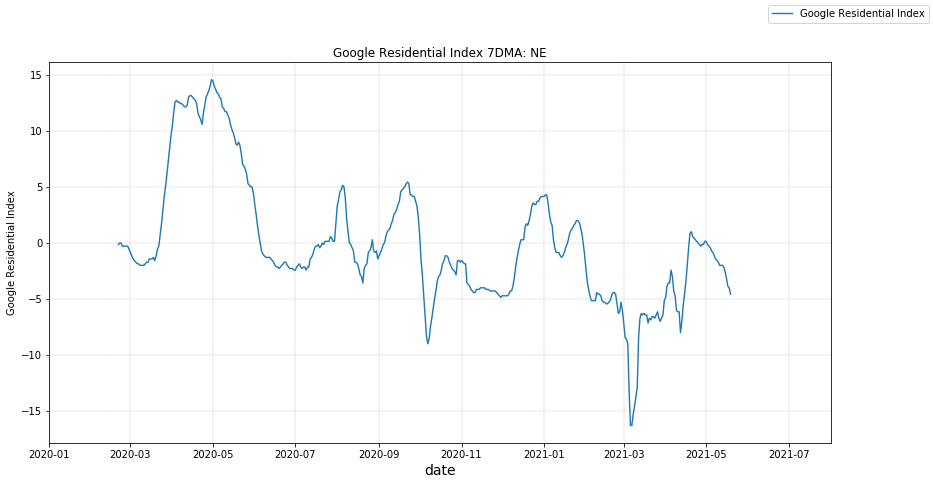

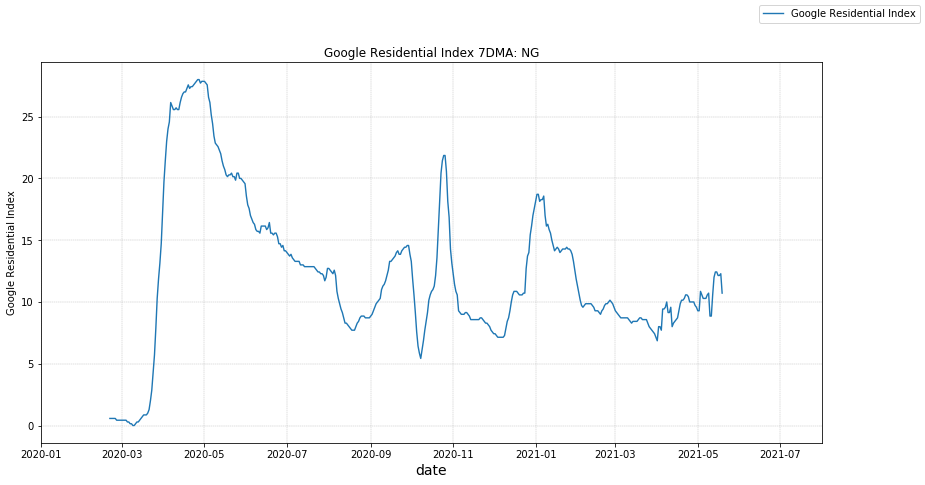

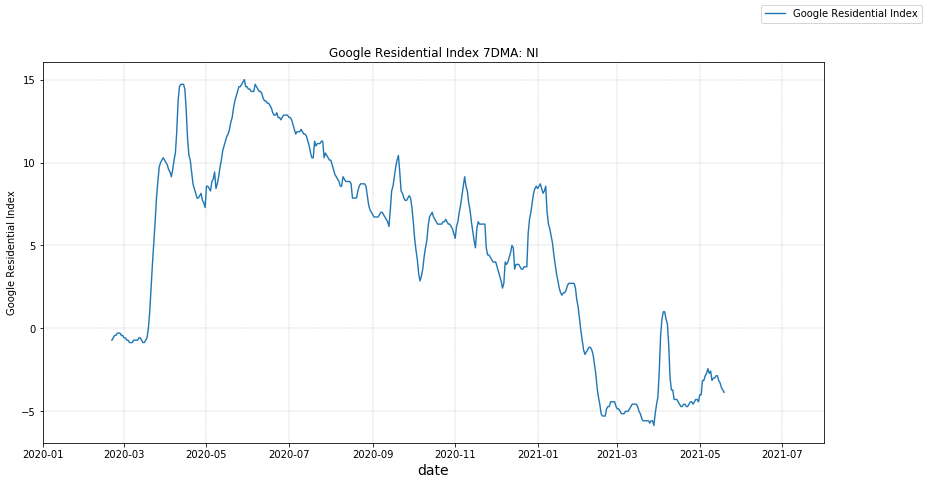

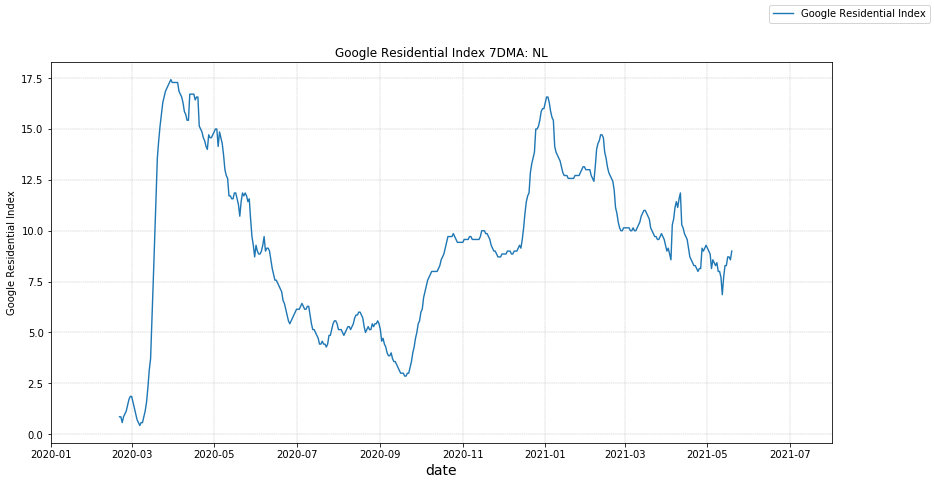

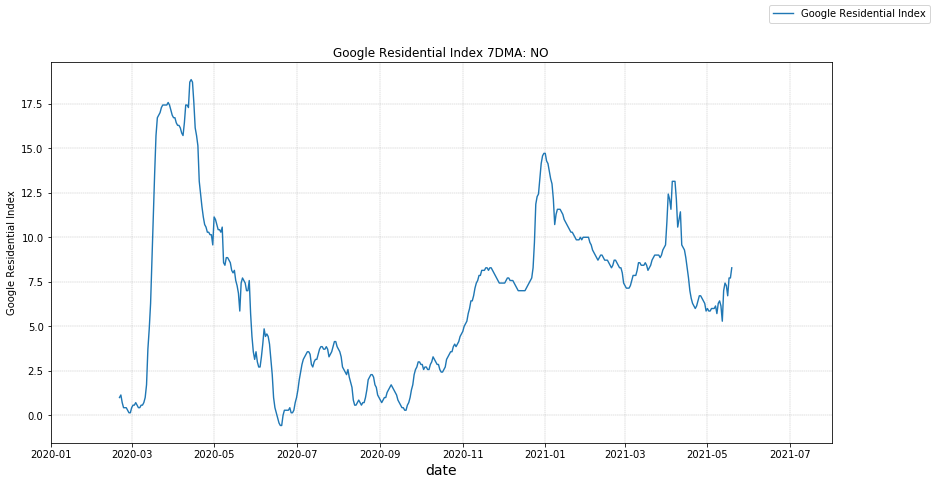

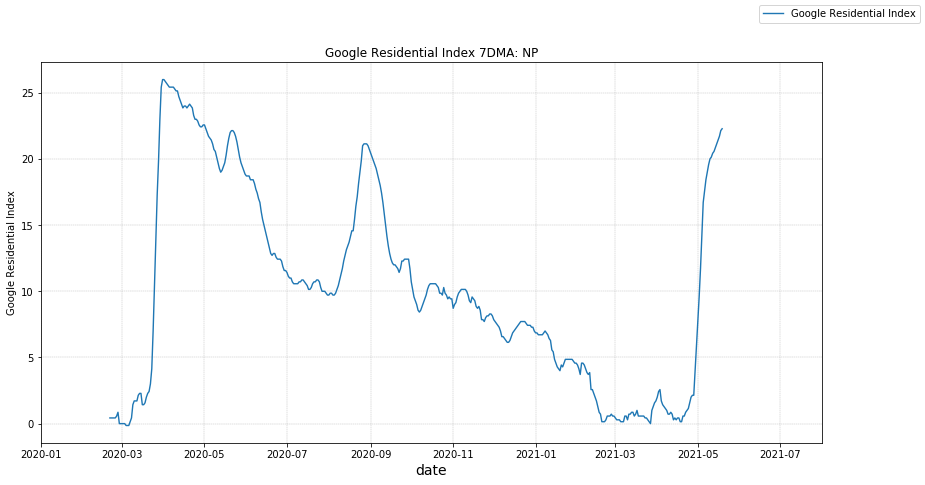

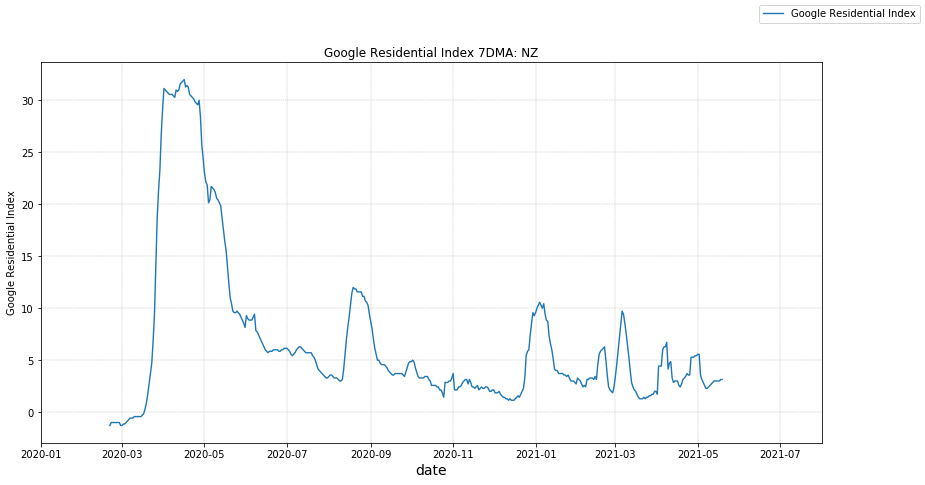

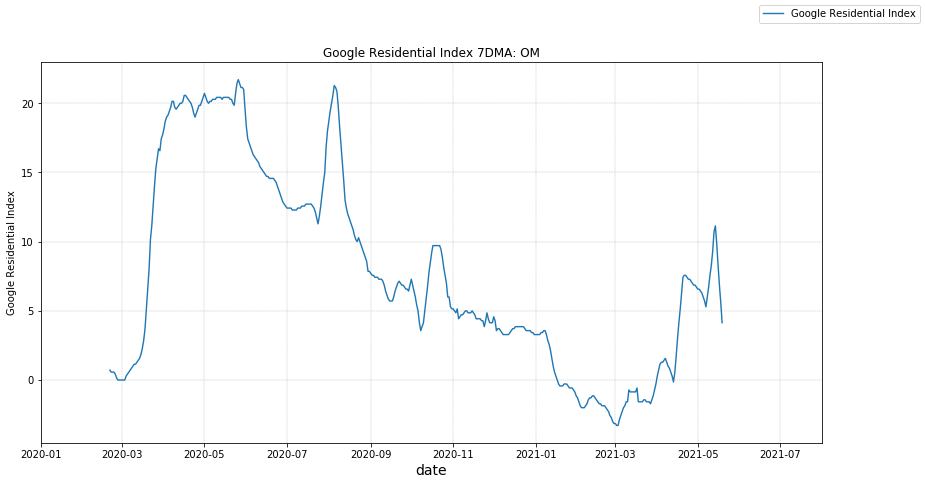

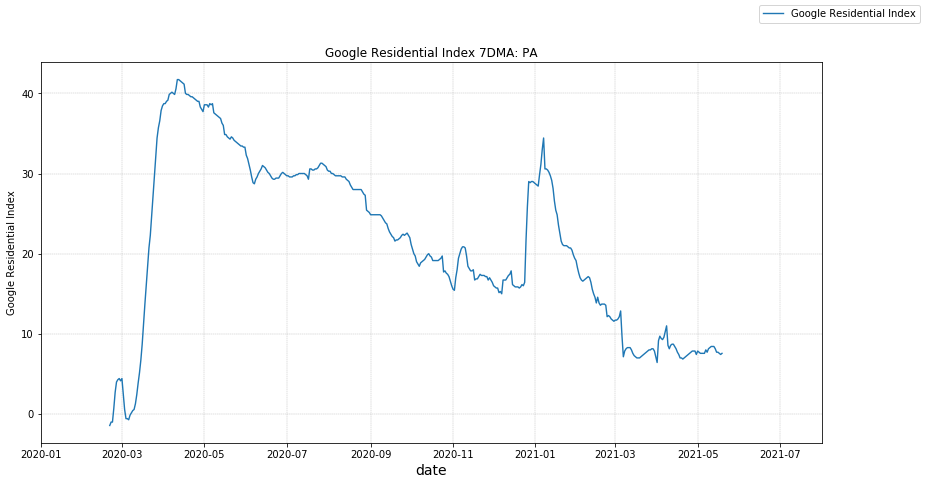

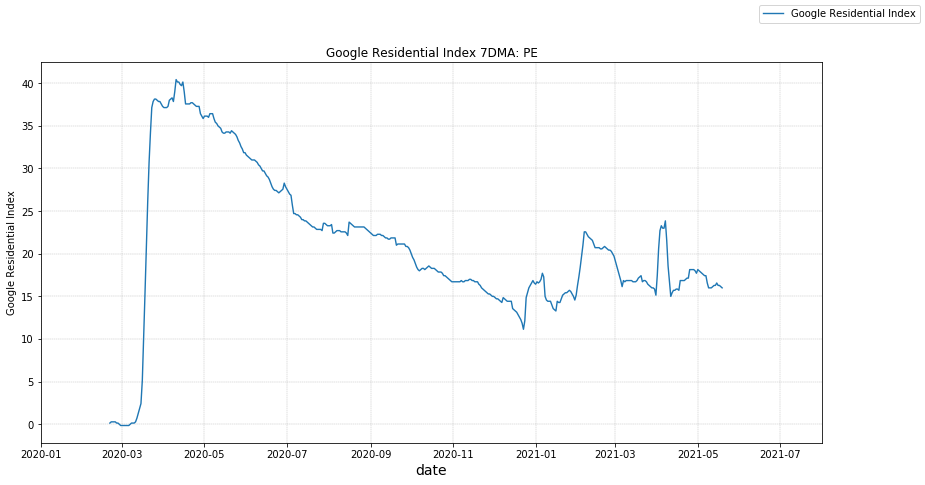

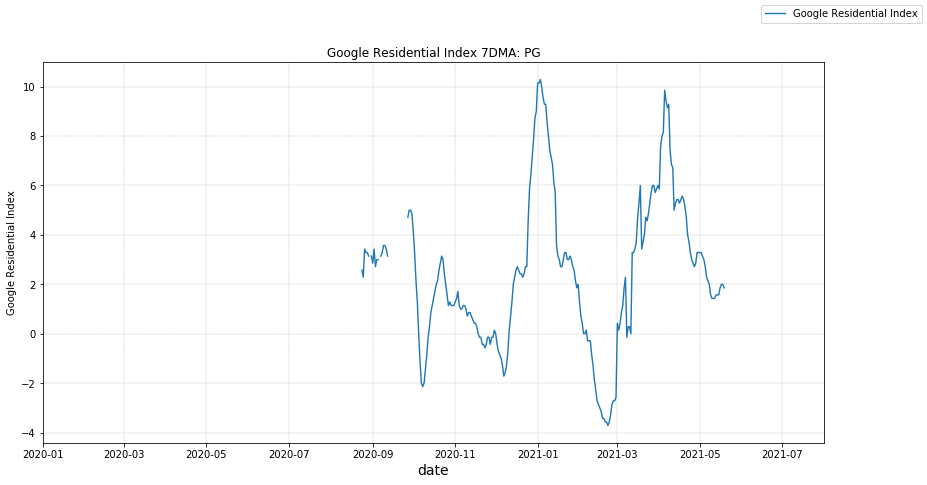

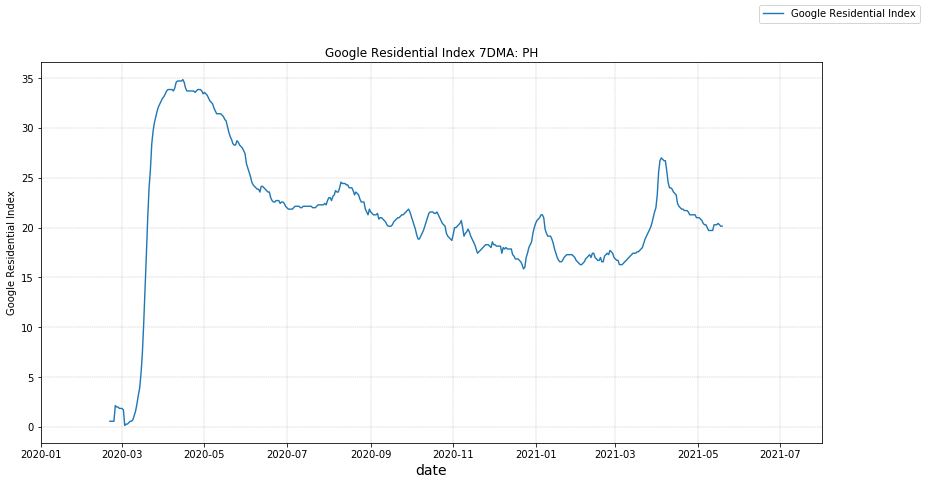

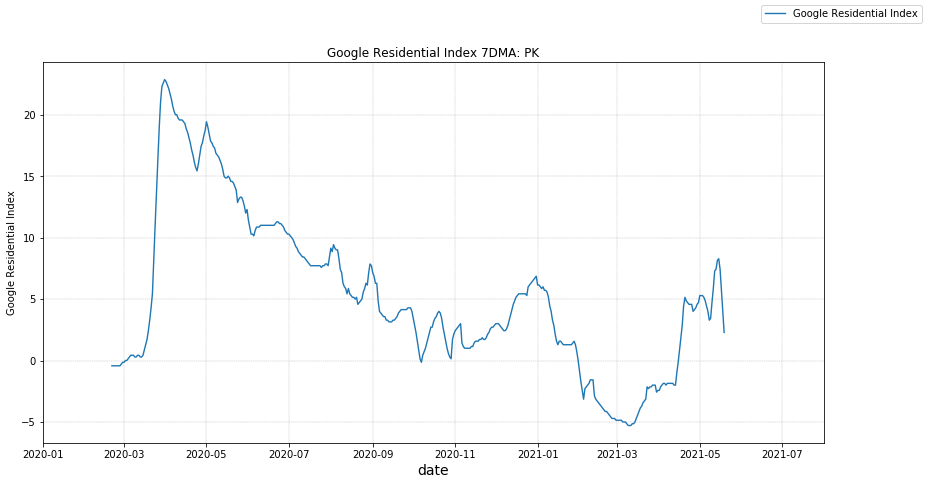

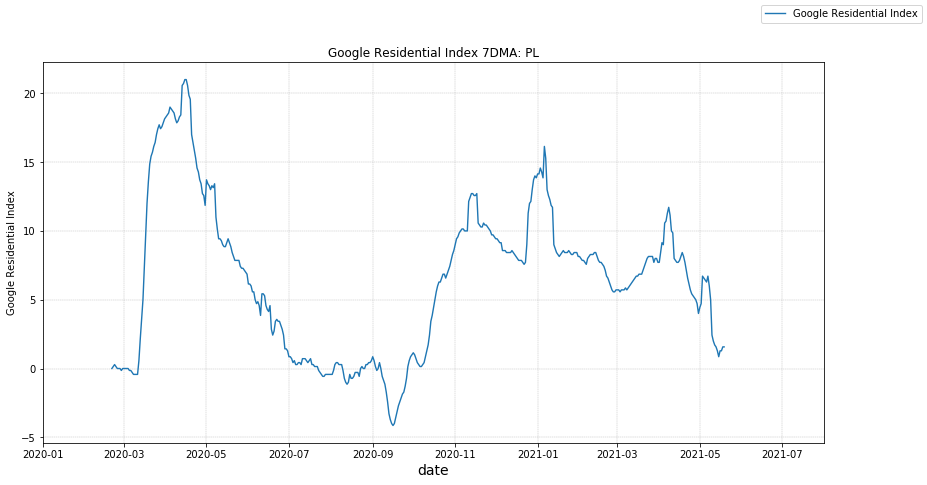

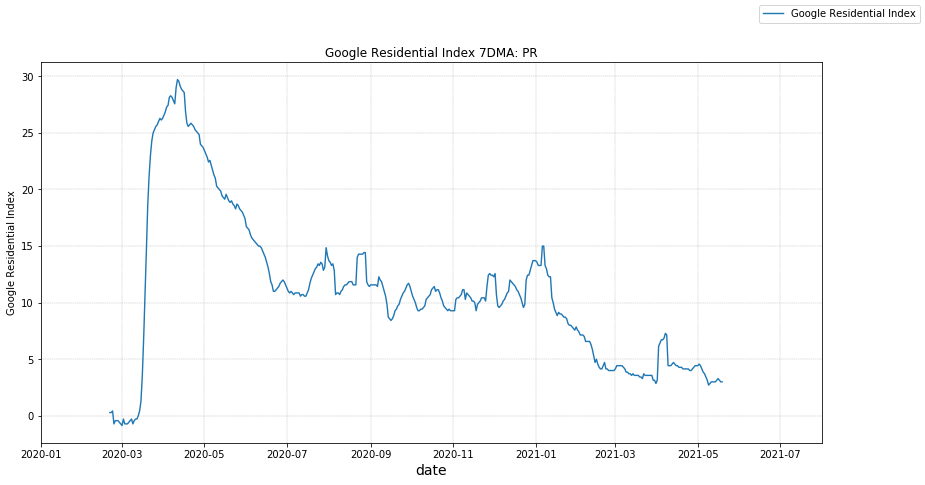

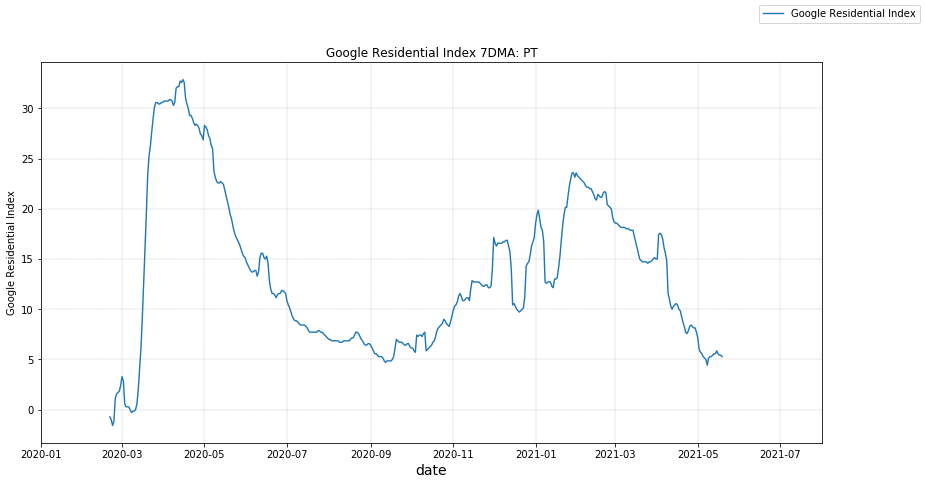

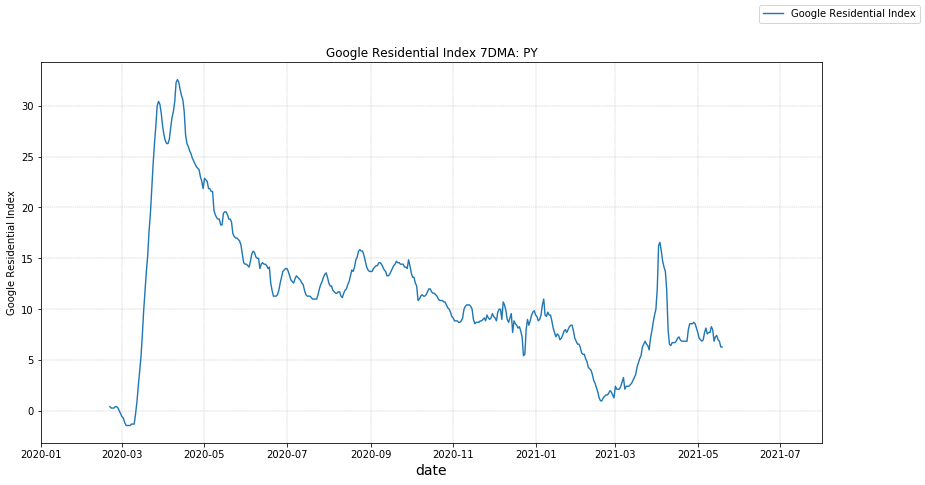

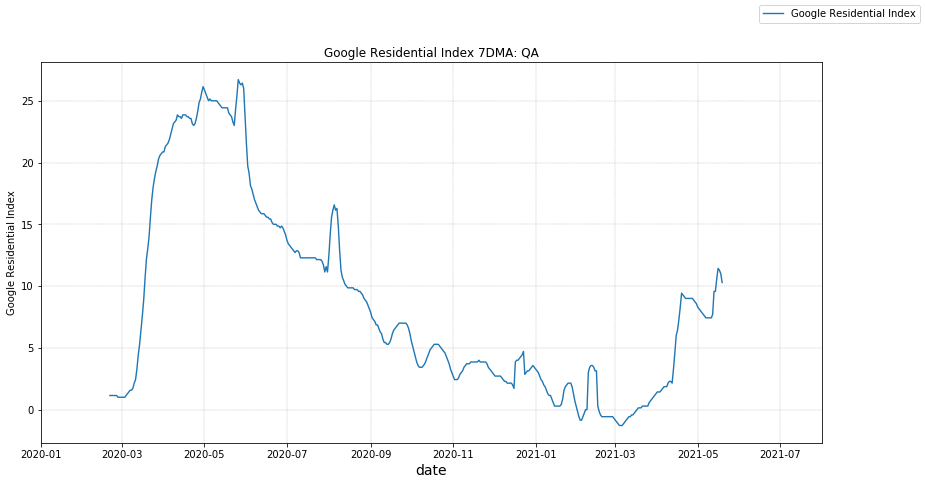

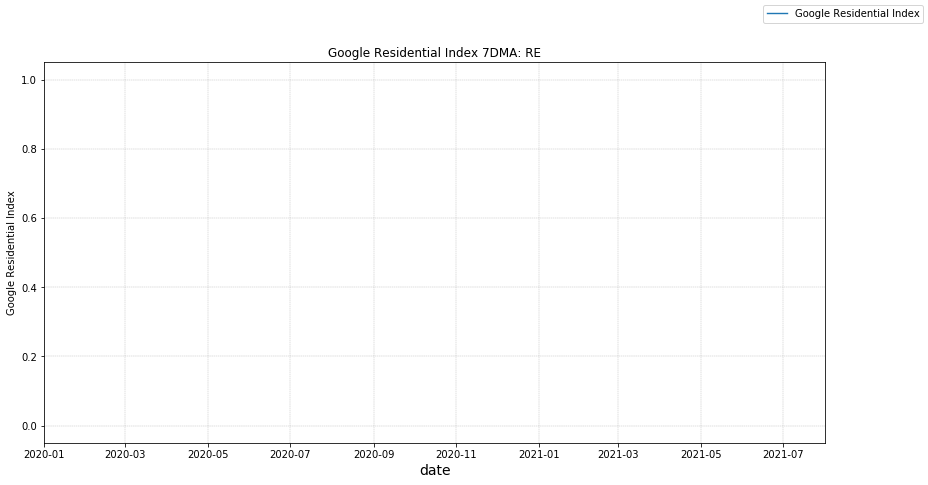

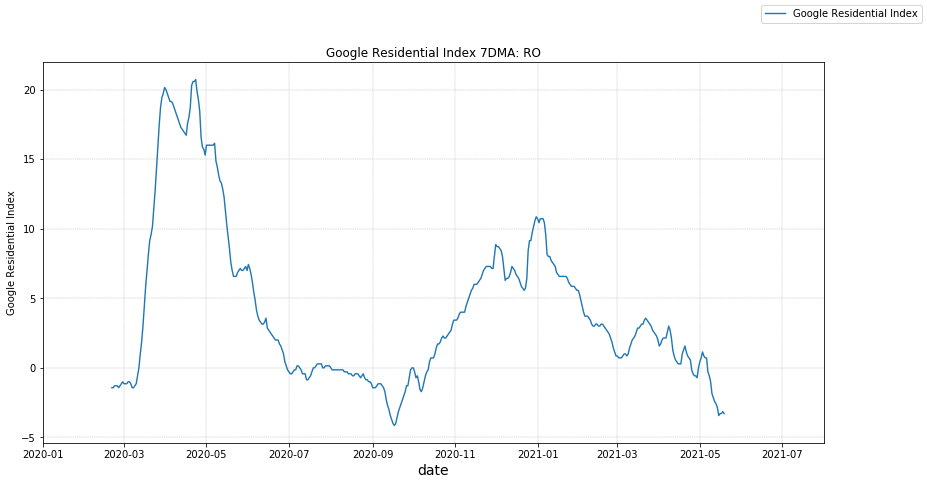

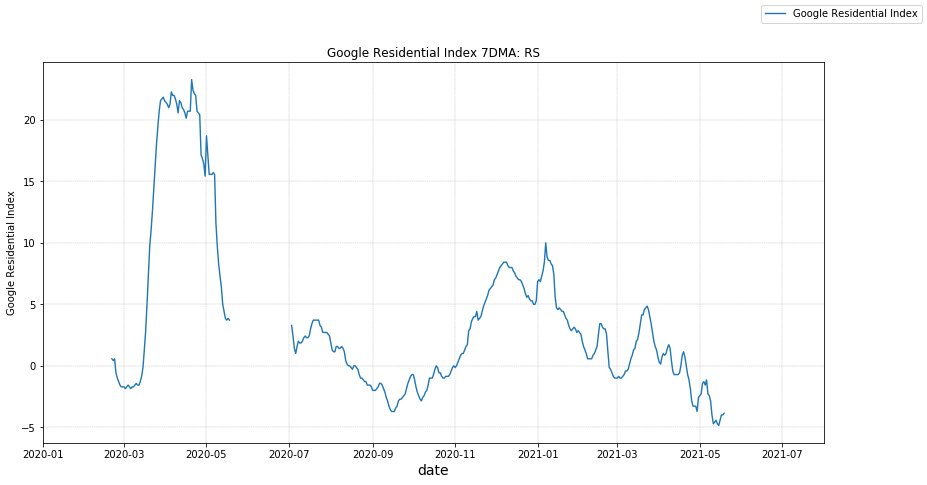

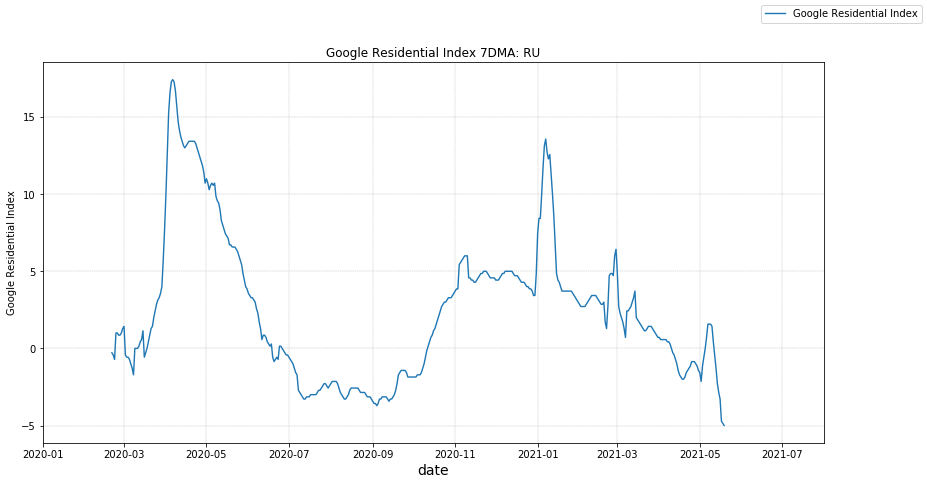

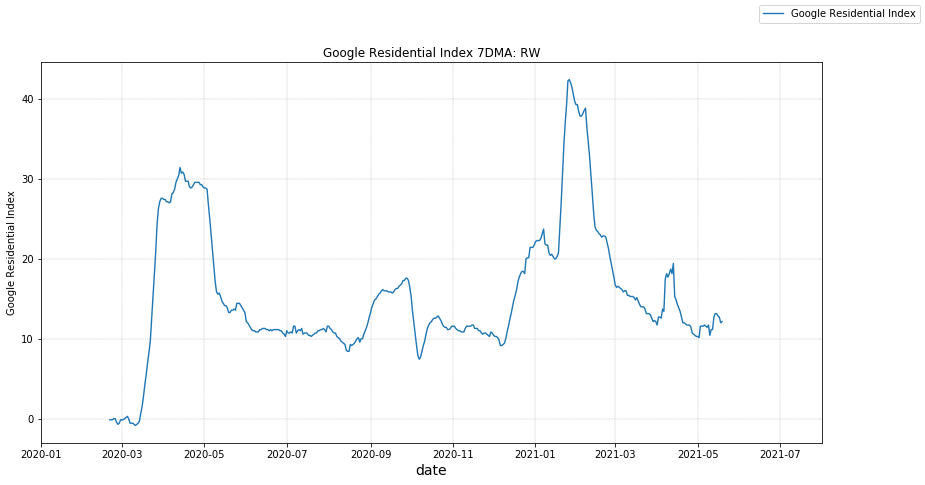

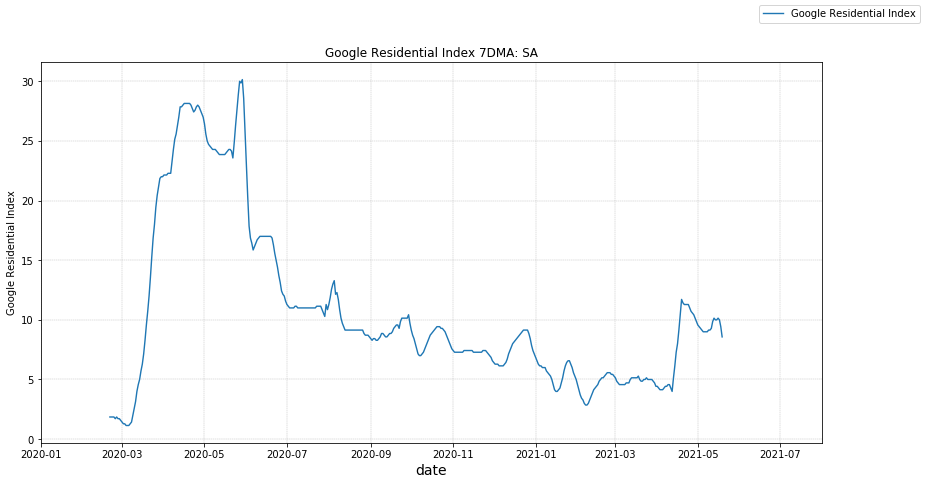

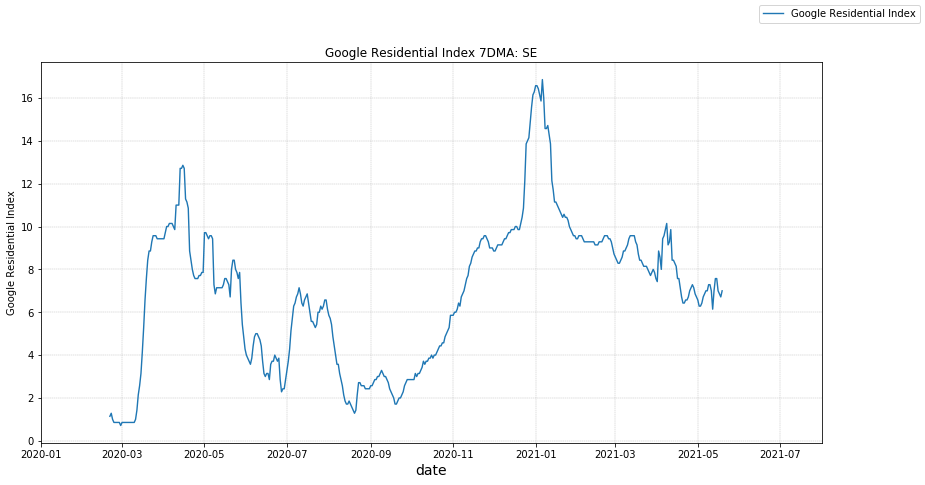

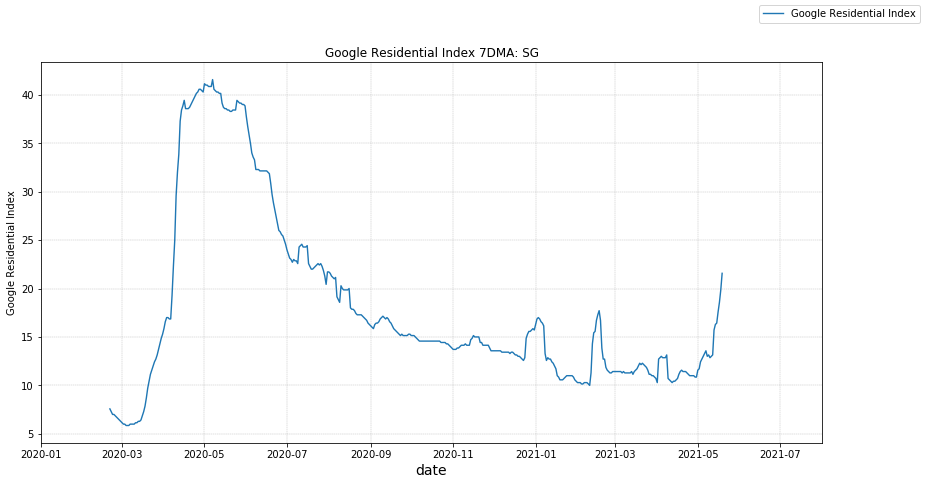

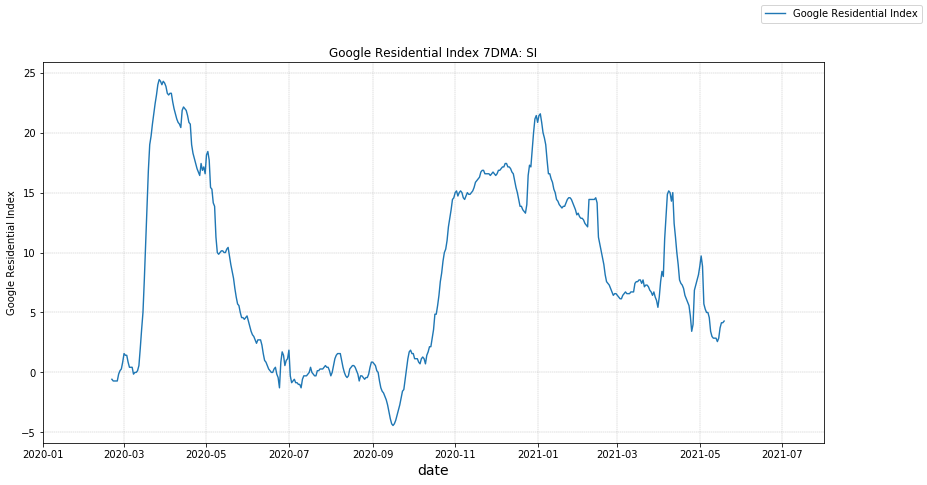

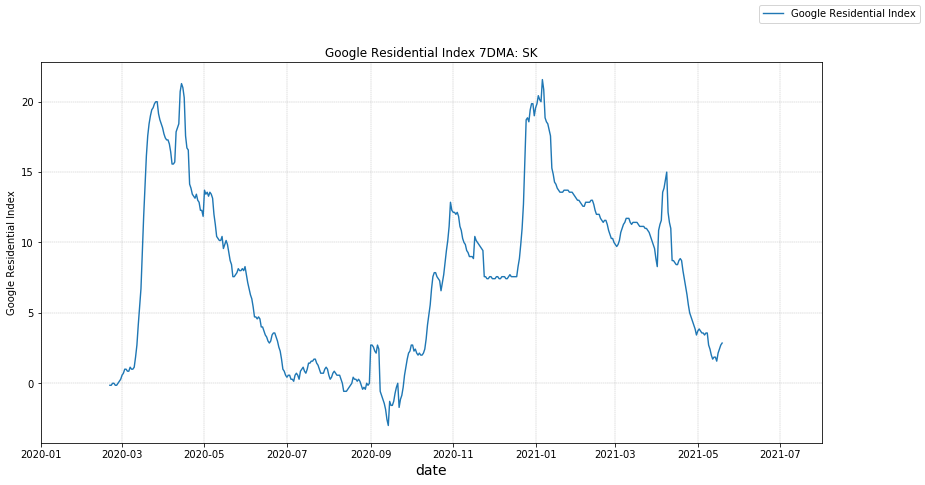

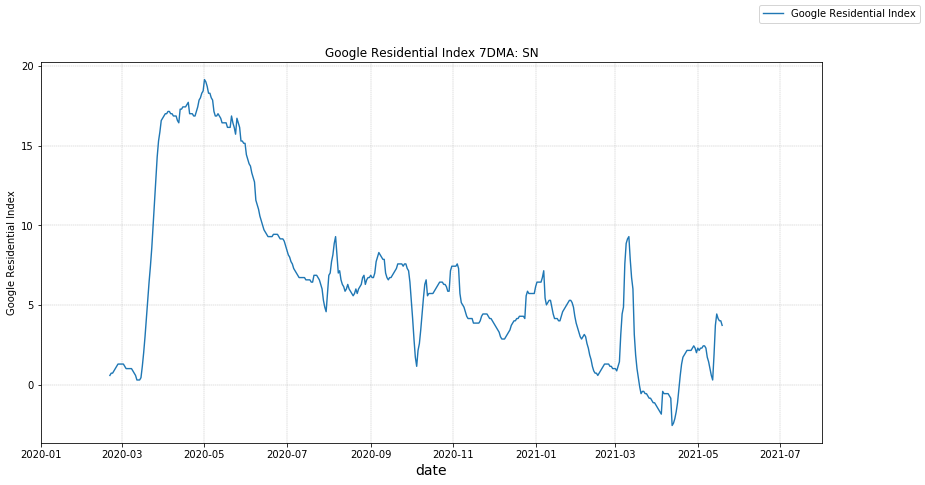

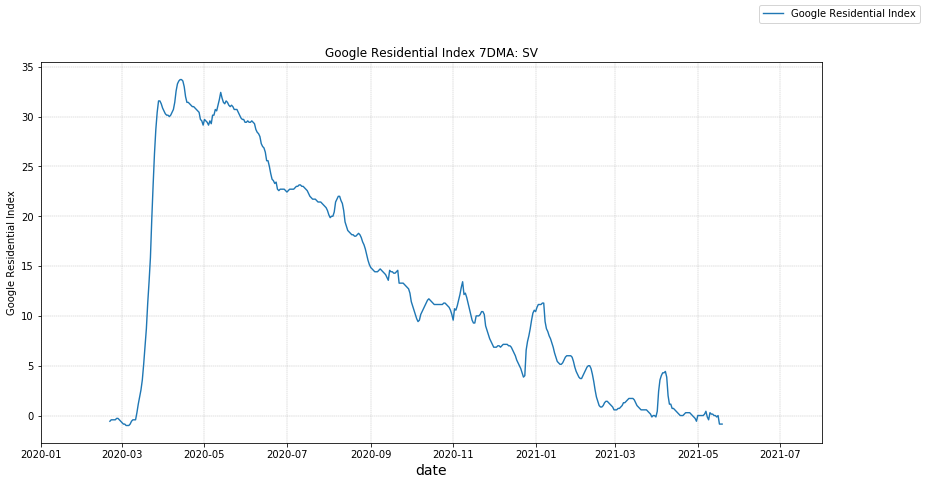

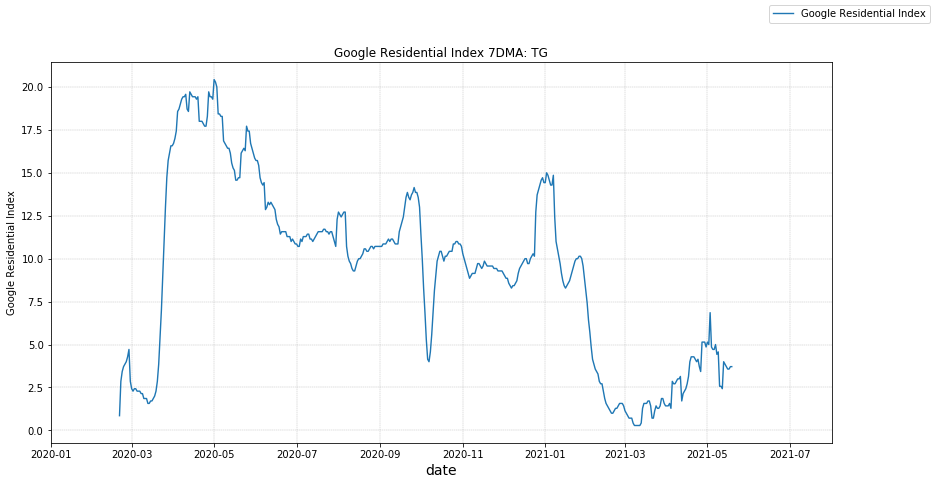

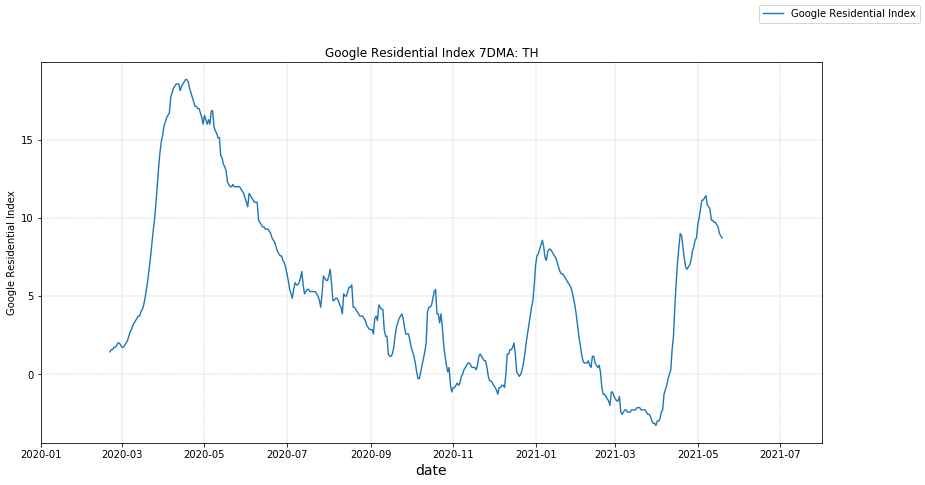

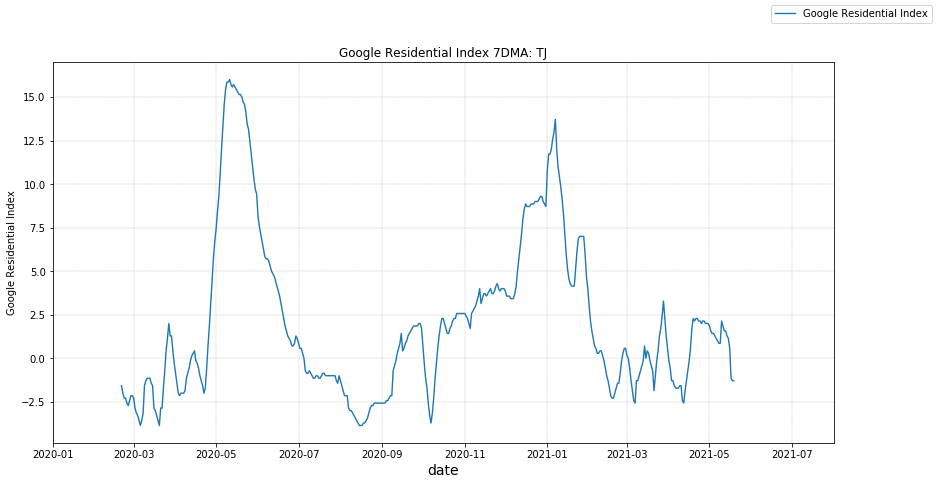

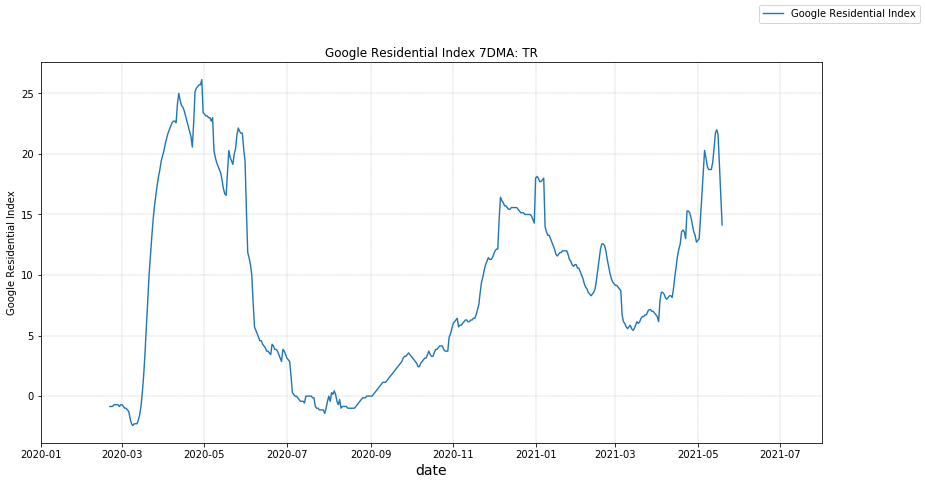

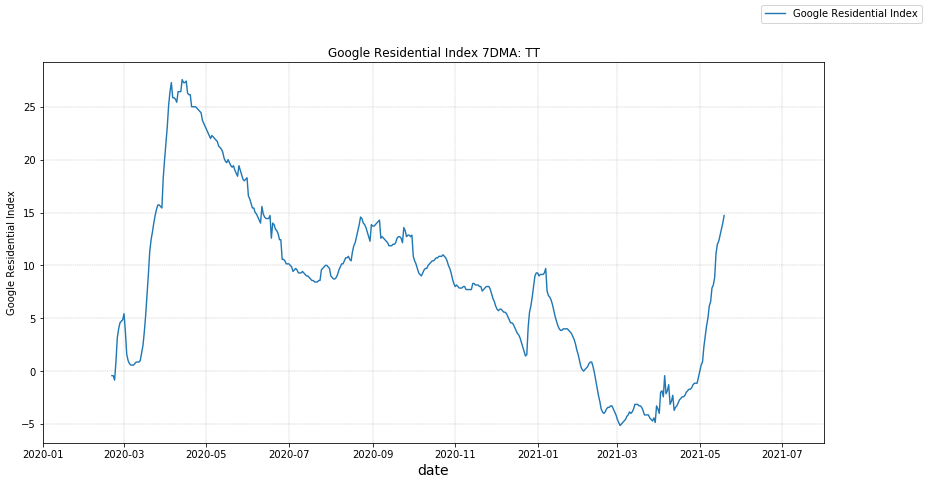

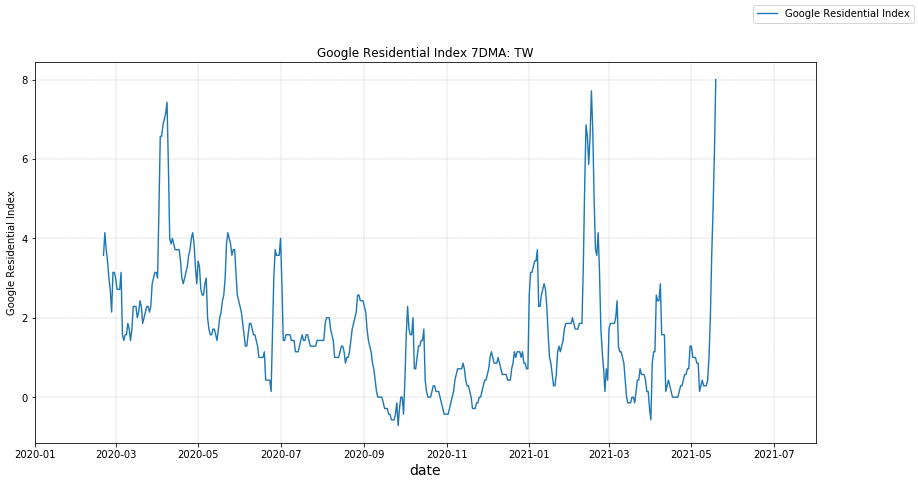

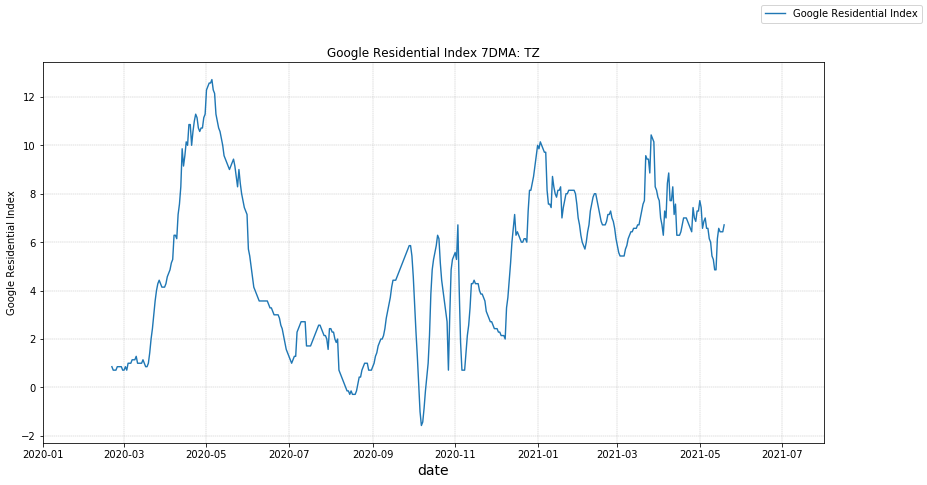

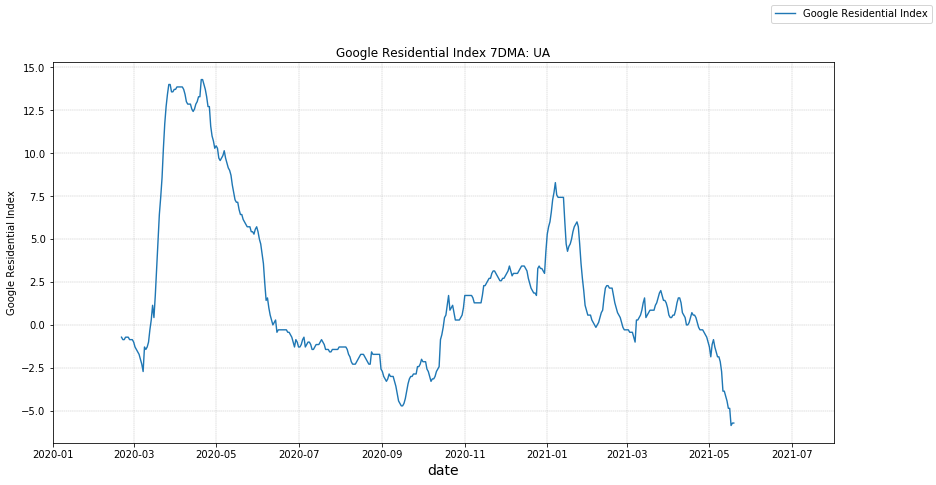

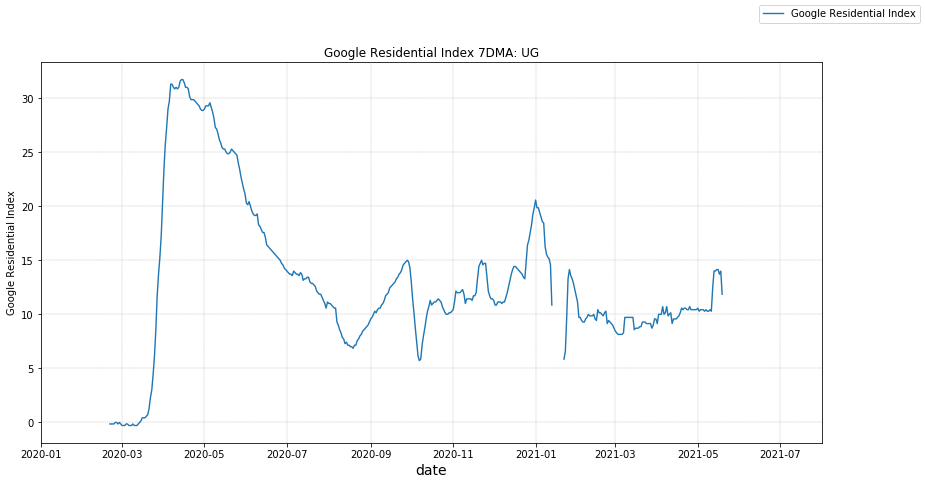

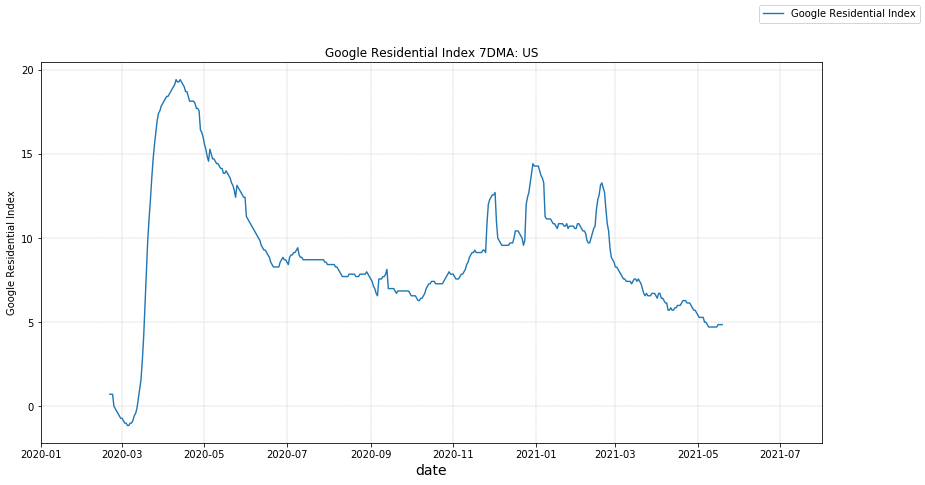

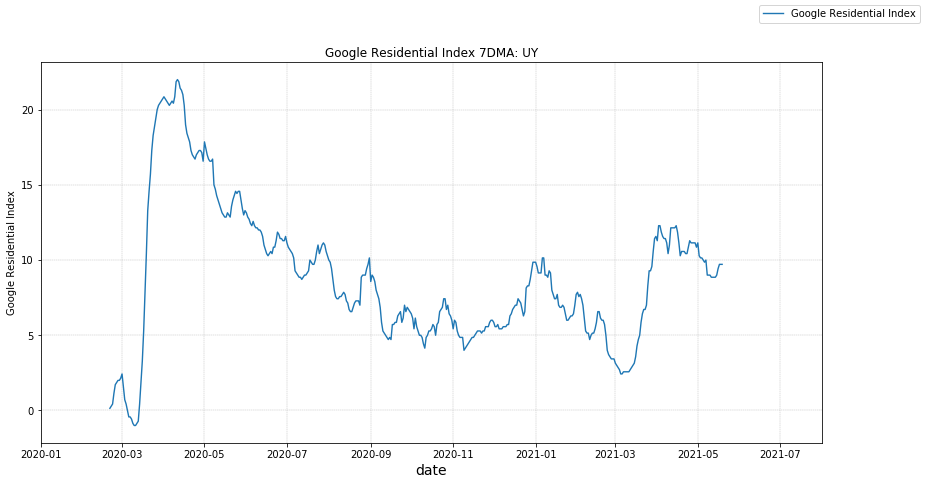

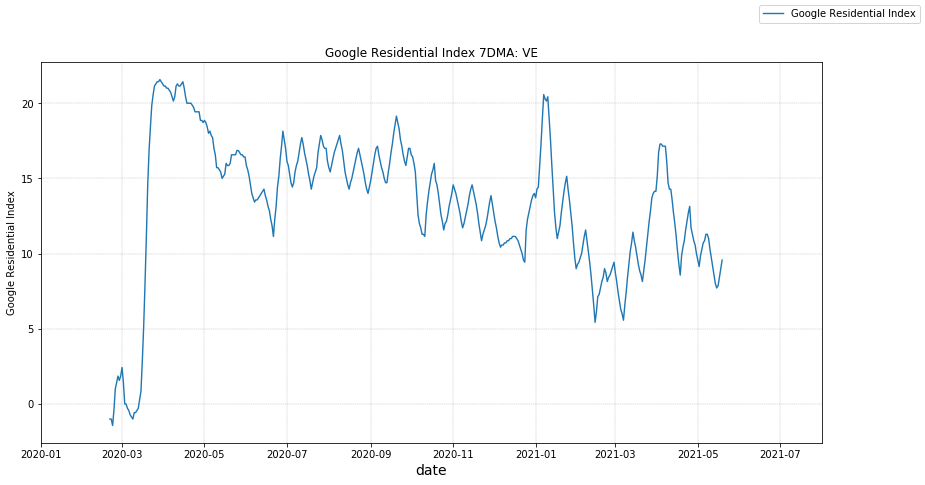

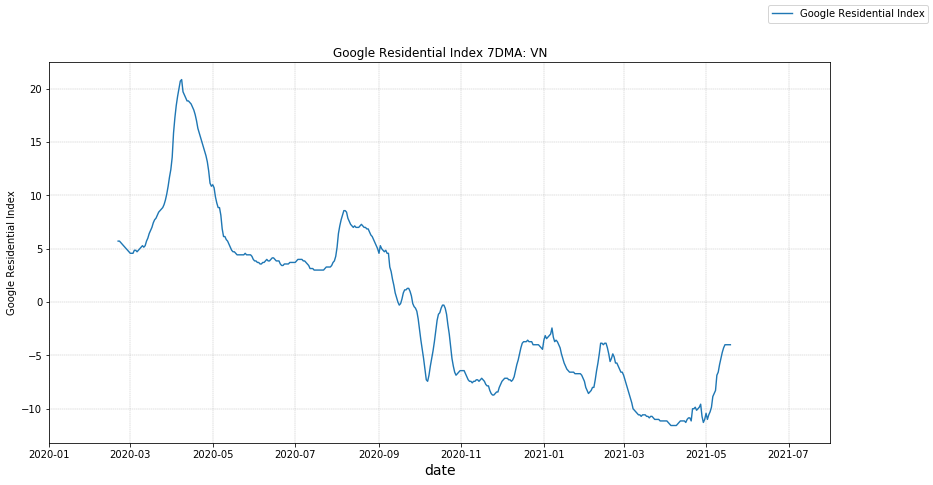

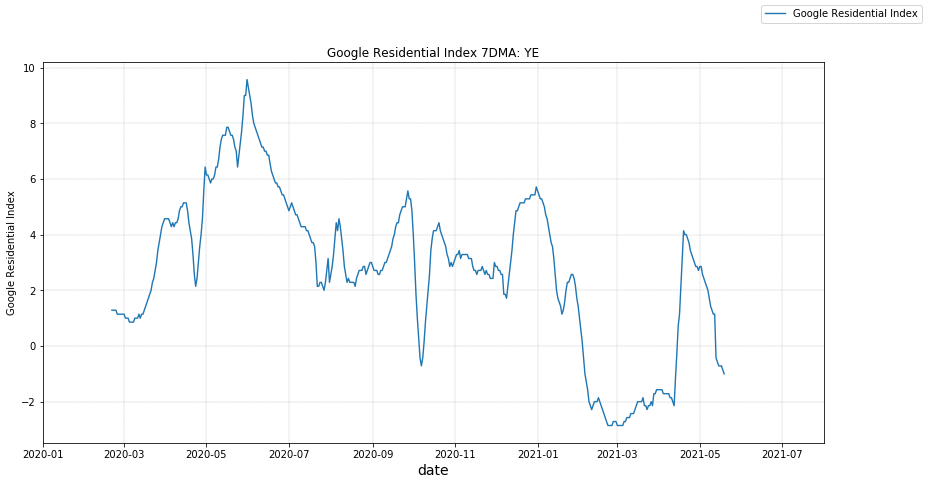

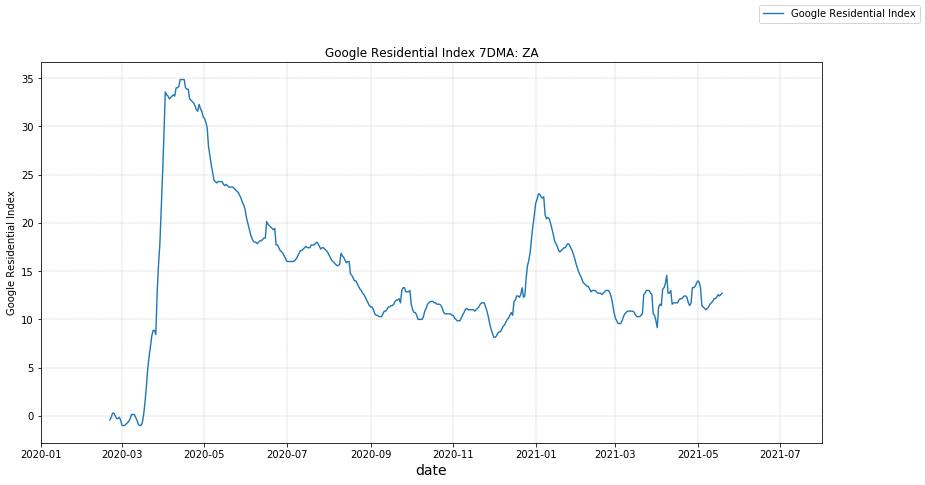

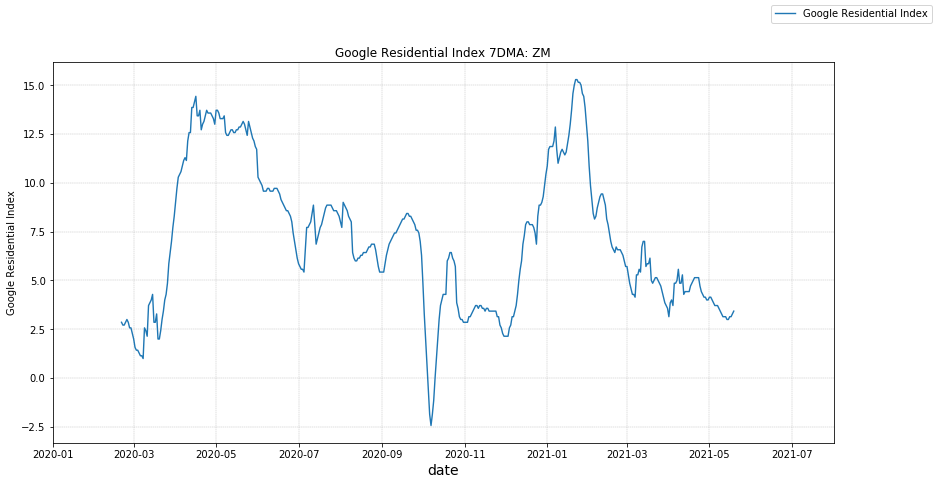

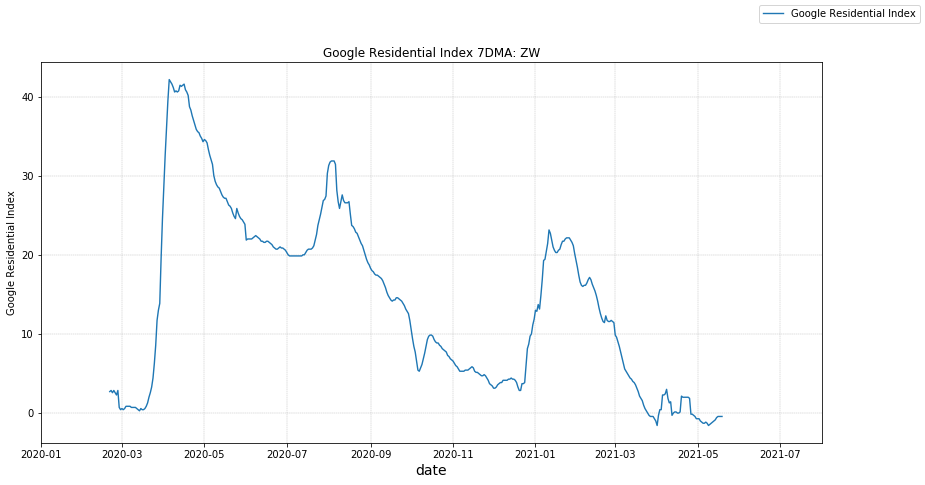

In [64]:
#plot
for i in country_list:
    plot_gri(df_final, i)